# Import Lib


In [1]:
!pip install -U langchain-core --q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 23.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.1.0 which is incompatible.


In [2]:
!pip install -U langchain langchain-community transformers accelerate --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 21.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==

In [3]:
!pip install ollama --q

In [4]:
!pip install langchain_chroma langchain-classic rank_bm25 --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 132.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s

In [5]:
!curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13281    0 13281    0     0  38239      0 --:--:-- --:--:-- --:--:-- 38273
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [16]:
from langchain_community.llms import Ollama
import os
import threading
import subprocess
import requests
import json
import time

def start_ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

# Start Ollama in a separate thread
ollama_thread = threading.Thread(target=start_ollama)
ollama_thread.start()
time.sleep(10)



In [7]:
!ollama pull qwen3-coder:30b

In [17]:
import pandas as pd
from typing import TypedDict, Annotated, List, Literal
from pydantic import BaseModel, Field
# from langgraph.graph import StateGraph, START, END
# from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage

In [18]:
from langchain_community.chat_models import ChatOllama

# local_llm = 'qwen2.5-coder:32b'
local_llm ='qwen3-coder:30b'

# Initialize the Ollama objects
llama = ChatOllama(model=local_llm, temperature=0)

# Now you can use both objects
prompt1 = "write pandas query to select the top 5 from business table"
response1 = llama.invoke(prompt1)
print("Response from llama3:", response1)

Response from llama3: content="Here are several ways to select the top 5 rows from a business table using pandas:\n\n## Basic Top 5 Rows\n```python\nimport pandas as pd\n\n# Select first 5 rows\ntop_5 = df.head(5)\n\n# Or using iloc\ntop_5 = df.iloc[:5]\n```\n\n## Top 5 by Specific Column (e.g., revenue, profit, etc.)\n```python\n# Top 5 by revenue (assuming 'revenue' column exists)\ntop_5_revenue = df.nlargest(5, 'revenue')\n\n# Top 5 by profit (assuming 'profit' column exists)\ntop_5_profit = df.nlargest(5, 'profit')\n\n# Top 5 by any numeric column\ntop_5 = df.nlargest(5, 'column_name')\n```\n\n## Top 5 by Sorting\n```python\n# Sort by a column and take top 5\ntop_5 = df.sort_values('column_name', ascending=False).head(5)\n\n# Sort by multiple columns\ntop_5 = df.sort_values(['column1', 'column2'], ascending=[False, True]).head(5)\n```\n\n## Example with Sample Data\n```python\nimport pandas as pd\n\n# Sample business data\ndata = {\n    'business_name': ['Company A', 'Company B', '

In [19]:
print(response1.content)

Here are several ways to select the top 5 rows from a business table using pandas:

## Basic Top 5 Rows
```python
import pandas as pd

# Select first 5 rows
top_5 = df.head(5)

# Or using iloc
top_5 = df.iloc[:5]
```

## Top 5 by Specific Column (e.g., revenue, profit, etc.)
```python
# Top 5 by revenue (assuming 'revenue' column exists)
top_5_revenue = df.nlargest(5, 'revenue')

# Top 5 by profit (assuming 'profit' column exists)
top_5_profit = df.nlargest(5, 'profit')

# Top 5 by any numeric column
top_5 = df.nlargest(5, 'column_name')
```

## Top 5 by Sorting
```python
# Sort by a column and take top 5
top_5 = df.sort_values('column_name', ascending=False).head(5)

# Sort by multiple columns
top_5 = df.sort_values(['column1', 'column2'], ascending=[False, True]).head(5)
```

## Example with Sample Data
```python
import pandas as pd

# Sample business data
data = {
    'business_name': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'revenue': [1000000, 1500000

# RAG for check relevent

In [7]:
class RelevanceCheck(BaseModel):
    """Structured output for relevance checking"""
    is_relevant: bool = Field(
        description="Whether the question is relevant to any available dataframes"
    )
    relevant_dataframes: List[str] = Field(
        description="List of dataframe names relevant to the question. Empty if not relevant."
    )
    confidence_score: float = Field(
        description="Confidence score between 0 and 1",
        ge=0.0,
        le=1.0
    )
    reasoning: str = Field(
        description="Explanation of why these dataframes are relevant"
    )


In [ ]:

#-------------------------------------------------------------------------------

import pandas as pd
from typing import List, Dict, Optional
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field
from typing import Literal
from langchain_community.embeddings import HuggingFaceEmbeddings


from langchain_chroma import Chroma
from langchain_community.retrievers import BM25Retriever
from langchain_classic.retrievers.ensemble import EnsembleRetriever
from langchain_core.documents import Document

import chromadb
from typing import List


# ============================================================================
# Part 1: Enhanced DataFrameInfo with SUB_category
# ============================================================================

class DataFrameInfo(BaseModel):
    """Information about a single dataframe with sub-category"""
    name: str = Field(description="Name of the dataframe")
    category: Literal[
        "business", "Prices", "National Accounts", "Short-Term Business",
        "Health", "Life Styles", "Saudi Census", "Energy",
        "Tourism, Hajj and Umrah", "NONE_OF_THE_ABOVE"
    ] = Field(description="Main category of the dataframe")
    sub_category: Optional[str] = Field(
        default=None,
        description="Sub-category for more specific classification (e.g., 'Small Enterprises', 'Umrah Statistics')"
    )
    columns: List[str] = Field(description="List of column names")

    description_en: str = Field(description="Brief description of the dataframe content in English.") # ⬅️ MODIFIED NAME
    description_ar: str = Field(description="Brief description of the dataframe content in Arabic.") # ⬅️ NEW FIELD

    sample_values: Dict[str, List[str]] = Field(
        default={},
        description="Sample unique values for key columns"
    )
    tags: List[str] = Field(
        default=[],
        description="Searchable tags extracted from the data"
    )

# ============================================================================
# Part 2: Build Rich Metadata with Sample Values (Updated)
# ============================================================================

def build_enriched_metadata(df: pd.DataFrame, df_info: DataFrameInfo) -> DataFrameInfo:
    """
    Enhance metadata with sample values from actual data
    This helps the LLM understand what's INSIDE the dataframe
    """
    sample_values = {}
    tags = []

    # For each column, get unique values
    for col in df_info.columns:
        if "_OBSV" in col:  # Skip observation value columns
            continue
        if col in df.columns:
            # Get unique values
            unique_vals = df[col].dropna().unique()

            # Convert to strings
            sample_list = [str(v) for v in unique_vals]
            sample_values[col] = sample_list



    return DataFrameInfo(
        name=df_info.name,
        category=df_info.category,
        sub_category=df_info.sub_category,
        columns=df_info.columns,
        description_en=df_info.description_en, # FIXED
        description_ar=df_info.description_ar,
        sample_values=sample_values,
        # tags=tags
    )

# ============================================================================
# Part 3: RAG-Based Dataframe Retriever (Updated)
# ============================================================================

class DataFrameRetriever:
    """
    RAG system to retrieve most relevant dataframes from 150+ options
    Uses semantic search to narrow down to top candidates
    """

    # def __init__(self, model_name: str = "BAAI/bge-m3"):
    def __init__(self, model_name: str = "mixedbread-ai/mxbai-embed-large-v1"):
        # self.encoder = SentenceTransformer(model_name)
        self.encoder = HuggingFaceEmbeddings(
            model_name=model_name,
            model_kwargs={'device': 'cuda'},  # or 'cuda' if GPU available
            encode_kwargs={'normalize_embeddings': True}


        )
        self.dataframe_metadata = {}
        self.documents = []  # Store as LangChain Documents
        self.vector_store = None
        self.bm25_retriever = None
        self.ensemble_retriever = None


    def index_dataframes(self, registry: dict):
        """
        Index all dataframes for hybrid retrieval
        Creates both vector embeddings and BM25 index
        """
        print(f"🔍 Indexing {len(registry)} dataframes for hybrid retrieval...")

        documents = []

        for df_name, df_data in registry.items():
            metadata = df_data['metadata']

            # Build rich searchable text
            search_text = self._build_search_text(metadata)


            # Create LangChain Document
            doc = Document(
                page_content=search_text,
                metadata={
                    "df_name": df_name,
                    "category": metadata.category,
                    "sub_category": metadata.sub_category,
                    # "description": metadata.description,
                    "description_en": metadata.description_en, # FIXED
                    "description_ar": metadata.description_ar,
                    "columns": ",".join(metadata.columns)
                }
            )

            documents.append(doc)

            self.dataframe_metadata[df_name] = metadata

        self.documents = documents

        # 1. Create Vector Store (ChromaDB)
        self.vector_store = Chroma.from_documents(
            documents=documents,
            embedding=self.encoder,
            collection_name="dataframe_metadata"
        )

        # 2. Create BM25 Retriever (keyword-based)
        self.bm25_retriever = BM25Retriever.from_documents(documents)
        self.bm25_retriever.k = 12  # Higher k for BM25

        # 3. Create Vector Retriever
        vector_retriever = self.vector_store.as_retriever(
            search_kwargs={"k": 12}  # High k for semantic search
        )

        # 4. Create Ensemble Retriever (weighted combination)
        self.ensemble_retriever = EnsembleRetriever(
            retrievers=[self.bm25_retriever, vector_retriever],
            weights=[0.7, 0.3]  # 70% BM25, 30% semantic
        )

        print(f"✅ Indexed {len(documents)} dataframes with hybrid search")



    def _build_search_text(self, metadata: DataFrameInfo) -> str:
      """
      Build rich text representation for both BM25 and semantic search
      """
      parts = []

      parts.append(f"Name: {metadata.name}")
      parts.append(f"Category: {metadata.category}")

      if metadata.sub_category:
          parts.append(f"Sub-category: {metadata.sub_category}")

      # parts.append(f"Description: {metadata.description}")
      parts.append(f"Description_EN: {metadata.description_en}") # FIXED
      parts.append(f"Description_AR: {metadata.description_ar}") # FIXED
      parts.append(f"Columns: {', '.join(metadata.columns)}")

      # Sample values (KEY for matching specific terms)
      if metadata.sample_values:
          parts.append("Sample data values:")
          for col, values in metadata.sample_values.items():
              values_str = ', '.join(values)  # Include more samples
              # values_str = ', '.join(values[:10])  # Include more samples

              parts.append(f"  {col}: {values_str}")


      return '\n'.join(parts)


    def retrieve_top_k(self, query: str, top_k: int = 5) -> List[tuple]:
      """
      Retrieve top-k most relevant dataframes using hybrid search
      Returns: List of (df_name, metadata)
      """
      # Use ensemble retriever
      results = self.ensemble_retriever.invoke(query)

      # Extract top-k unique dataframes
      seen = set()
      top_results = []

      for doc in results:
          df_name = doc.metadata["df_name"]
          if df_name not in seen:
              seen.add(df_name)
              top_results.append((
                  df_name,
                  self.dataframe_metadata[df_name]
              ))


      return top_results

# ============================================================================
# Part 4: Updated Registry with SUB_category
# ============================================================================



def get_dataframe_registry() -> dict:
    """Enhanced registry with sample values and sub_categories"""


  # -----------------------
  # 1) READ ALL DATAFRAMES
  # -----------------------

    df_dpv_na_sector_efna0101                                       = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_0_API_DPV_NA_SECTOR_EFNA0101.csv")
    df_dpv_na_isic_efna0101                                         = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_1_API_DPV_NA_ISIC_EFNA0101.csv")
    df_dpv_na_exp_efna0101                                          = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_2_API_DPV_NA_EXP_EFNA0101.csv")
    df_dpv_na_efna0701                                              = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_3_API_DPV_NA_EFNA0701.csv")
    df_dpv_na_sector_efna0201                                       = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_4_API_DPV_NA_SECTOR_EFNA0201.csv")
    df_dpv_na_isic_efna0201                                         = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_5_API_DPV_NA_ISIC_EFNA0201.csv")
    df_dpv_na_sector_y_efna0201                                     = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_6_API_DPV_NA_SECTOR_Y_EFNA0201.csv")
    df_dpv_na_isic_y_efna0201                                       = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_7_API_DPV_NA_ISIC_Y_EFNA0201.csv")
    df_dpv_na_main_efna0201                                         = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_8_API_DPV_NA_MAIN_EFNA0201.csv")
    df_dpv_na_main_y_efna0201                                       = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_9_API_DPV_NA_MAIN_Y_EFNA0201.csv")
    df_dpv_na_main_efna0101                                         = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_10_API_DPV_NA_MAIN_EFNA0101.csv")
    df_dpv_na_main_y_efna0101                                       = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_11_API_DPV_NA_MAIN_Y_EFNA0101.csv")
    df_dpv_na20_efna0401                                            = pd.read_csv("/content/data/National_Accounts_Statistics_Gross_Domestic_Product_Statistics_12_API_DPV_NA20_EFNA0401.csv")
    df_dpv_na_efna040801                                            = pd.read_csv("/content/data/National_Accounts_Statistics_National_Accounts_Statistics_13_API_DPV_NA_EFNA040801.csv")
    #df_labour_market                                                = pd.read_csv("/content/data/Labour market.CSV")
    #df_tourism_hajj                                                 = pd.read_csv("/content/data/PE_TORES_STAT_VIEW_2022.csv")
    # df_business                                                   = pd.read_csv("/content/Small_and_Medium_Enterprises_Statistics_3.csv")
    # df_business_REVENUES                                          = pd.read_csv("/content/Small_and_Medium_Enterprises_Statistics_4.csv"
    df_umrah                                                        = pd.read_csv("/content/data/Umrah_Statistics_3.csv")
    df_price                                                        = pd.read_csv("/content/data/Consumer Prices Statistics Monthly Percent.csv")
    df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1                       = pd.read_csv("/content/data/Real_Estate_Prices_DPV_RS_CHANGE_QTR_1.csv")
    df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0                      = pd.read_csv("/content/data/Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0.csv")
    df_Real_Estate_Prices_DPV_RS_EFPI0401_2                         = pd.read_csv("/content/data/Real_Estate_Prices_DPV_RS_EFPI0401_2.csv")
    df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4                = pd.read_csv("/content/data/Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4.csv")
    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5             = pd.read_csv("/content/data/Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5.csv")
    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6            = pd.read_csv("/content/data/Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6.csv")

    df_sme_EXPENDITURE                                              = pd.read_csv("/content/data/Small_and_Medium_Enterprises_Statistics_3.csv").drop_duplicates()
    df_sme_REVENUE                                                  = pd.read_csv("/content/data/Small_and_Medium_Enterprises_Statistics_4.csv").drop_duplicates()

    df_sme_COMPENSATION                                             = pd.read_csv("/content/data/Small_and_Medium_Enterprises_Statistics_5.csv").drop_duplicates()
    df_sme_SURPLUS                                                  = pd.read_csv("/content/data/Small_and_Medium_Enterprises_Statistics_6.csv").drop_duplicates()

    df_str_eco_establishment_Y                                      = pd.read_csv("/content/data/Structural_Business_Statistics_7.csv").drop_duplicates() #by eco act & size
    df_str_eco_establishment_Q                                      = pd.read_csv("/content/data/Structural_Business_Statistics_8.csv").drop_duplicates() #by eco act

    df_str_revenue_Q                                                = pd.read_csv("/content/data/Structural_Business_Statistics_9.csv").drop_duplicates()
    df_str_revenue_Y                                                = pd.read_csv("/content/data/Structural_Business_Statistics_10.csv").drop_duplicates()

    df_str_expenditure_Q                                            = pd.read_csv("/content/data/Structural_Business_Statistics_11.csv").drop_duplicates()
    df_str_expenditure_Y                                            = pd.read_csv("/content/data/Structural_Business_Statistics_12.csv").drop_duplicates()

    df_str_surplus_Y                                                = pd.read_csv("/content/data/Structural_Business_Statistics_13.csv").drop_duplicates()
    df_str_surplus_Q                                                = pd.read_csv("/content/data/Structural_Business_Statistics_14.csv").drop_duplicates()

    df_str_eco_establishment_size_Y                                 = pd.read_csv("/content/data/Structural_Business_Statistics_17.csv").drop_duplicates()#by size



    dfs = [
    # National Accounts
    df_dpv_na_sector_efna0101,
    df_dpv_na_isic_efna0101,
    df_dpv_na_exp_efna0101,
    df_dpv_na_efna0701,
    df_dpv_na_sector_efna0201,
    df_dpv_na_isic_efna0201,
    df_dpv_na_sector_y_efna0201,
    df_dpv_na_isic_y_efna0201,
    df_dpv_na_main_efna0201,
    df_dpv_na_main_y_efna0201,
    df_dpv_na_main_efna0101,
    df_dpv_na_main_y_efna0101,
    df_dpv_na20_efna0401,
    df_dpv_na_efna040801,


    # Badawy's DFs
    df_umrah,

    # Prices statistics
    df_price,
    df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1,
    df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0,
    df_Real_Estate_Prices_DPV_RS_EFPI0401_2,
    df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4,
    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5,
    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6,

    # SME statistics
    df_sme_EXPENDITURE,
    df_sme_REVENUE,
    df_sme_COMPENSATION,
    df_sme_SURPLUS,

    # Structural Business statistics
    df_str_eco_establishment_Y,
    df_str_eco_establishment_Q,
    df_str_revenue_Q,
    df_str_revenue_Y,
    df_str_expenditure_Q,
    df_str_expenditure_Y,
    df_str_surplus_Y,
    df_str_surplus_Q,
    df_str_eco_establishment_size_Y
]



    for df_iter in dfs:
      for column in df_iter.columns:
          if df_iter[column].dtype == 'O':
              df_iter[column] = df_iter[column].apply(
                  lambda v: (
                      " ".join(v.strip().split())  # strip + collapse multiple spaces
                      if isinstance(v, str)
                      else v
                  ))


    def filtered_cols(df):
        """
        Return a list of column names for metadata:
        - lowercase the names in the returned list
        - exclude any column that ends with _ar or _code (case-insensitive)
        """
        return [c for c in df.columns if not (c.lower().endswith("_code"))] #change 1

    # -----------------------
    # 2) DATAFRAME INFO OBJECTS
    # -----------------------

    dpv_na_sector_efna0101_info = DataFrameInfo(
        name='df_dpv_na_sector_efna0101',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_sector_efna0101),
        description_en='Quarterly GDP at current prices broken down by institutional sectors — showing value added contributions from oil, non-oil, government, and private sectors.',
        description_ar='الناتج المحلي الإجمالي ربع السنوي بالأسعار الجارية مفصلاً حسب القطاعات المؤسسية، يُظهر مساهمات القيمة المضافة من القطاع النفطي، والقطاع غير النفطي، والقطاع الحكومي، والقطاع الخاص.'
    )

    dpv_na_isic_efna0101_info = DataFrameInfo(
        name='df_dpv_na_isic_efna0101',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_isic_efna0101),
        description_en='Quarterly GDP at current prices by economic activities (ISIC classification), detailing output from industries such as manufacturing, utilities, transport, and services.',
        description_ar='الناتج المحلي الإجمالي ربع السنوي بالأسعار الجارية حسب الأنشطة الاقتصادية (تصنيف الأنشطة الصناعية الدولية الموحد ISIC)، يُفصل الناتج من صناعات مثل التصنيع، والمرافق، والنقل، والخدمات.'
    )

    dpv_na_exp_efna0101_info = DataFrameInfo(
        name='df_dpv_na_exp_efna0101',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_exp_efna0101),
        description_en='Quarterly GDP at current prices by expenditure components, reflecting demand-side contributions from consumption, investment, exports, and imports.*',
        description_ar='الناتج المحلي الإجمالي ربع السنوي بالأسعار الجارية حسب مكونات الإنفاق، ويعكس المساهمات من جانب الطلب المتمثلة في الاستهلاك، والاستثمار، والصادرات، والواردات.'
    )


    dpv_na_efna0701_info = DataFrameInfo(
    name='df_dpv_na_efna0701',
    category='National Accounts',
    sub_category='Gross_Domestic_Product_Statistics',
    columns=filtered_cols(df_dpv_na_efna0701),
    description_en ="Annual GDP per capita at current prices as a single time series (values only, no breakdown).",
    description_ar =".الناتج المحلي الإجمالي السنوي للفرد بالأسعار الجارية كسلسلة زمنية واحدة (القيم فقط، بدون تفصيل)"

    )

    dpv_na_sector_efna0201_info = DataFrameInfo(
        name='df_dpv_na_sector_efna0201',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_sector_efna0201),
        description_en="Quarterly GDP growth rates (%) at current prices by institutional sectors (dimension: INSTITUTIONAL_SECTORS_ENGL, time: QUARTER_TIME/YEAR_QUARTER_TIME).",
        description_ar ="معدلات نمو الناتج المحلي الإجمالي ربع السنوية (%) بالأسعار الجارية حسب القطاعات المؤسسية (dimension: INSTITUTIONAL_SECTORS_ARAB, time: QUARTER_TIME/YEAR_QUARTER_TIME)."
    )

    dpv_na_isic_efna0201_info = DataFrameInfo(
        name='df_dpv_na_isic_efna0201',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_isic_efna0201),
        description_en="Quarterly GDP growth rates (%) at current prices by detailed ISIC economic activities (dimension: ECONOMIC_ACTIVITY_ENGL, time: QUARTER_TIME/YEAR_QUARTER_TIME).",
        description_ar = "معدلات نمو الناتج المحلي الإجمالي ربع السنوية (%) بالأسعار الجارية حسب الأنشطة الاقتصادية التفصيلية (ISIC) (dimension: ECONOMIC_ACTIVITY_ARAB ,time: QUARTER_TIME/YEAR_QUARTER_TIME)."
    )

    dpv_na_sector_y_efna0201_info = DataFrameInfo(
        name='df_dpv_na_sector_y_efna0201',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_sector_y_efna0201),
        description_en="Annual GDP growth rates (%) at current prices by institutional sectors (dimension: INSTITUTIONAL_SECTORS_ENGL, time: YEAR_TIME).",
        description_ar = "معدلات نمو الناتج المحلي الإجمالي السنوية (%) بالأسعار الجارية حسب القطاعات المؤسسية (dimension: INSTITUTIONAL_SECTORS_ARAB, time: YEAR_TIME)."

    )

    dpv_na_isic_y_efna0201_info = DataFrameInfo(
        name='df_dpv_na_isic_y_efna0201',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_isic_y_efna0201),
        description_en="Annual GDP growth rates (%) at current prices by detailed ISIC economic activities (dimension: ECONOMIC_ACTIVITY_ENGL, time: YEAR_TIME).",
        description_ar= "معدلات نمو الناتج المحلي الإجمالي السنوية (%) بالأسعار الجارية حسب الأنشطة الاقتصادية التفصيلية (ISIC) (dimension: ECONOMIC_ACTIVITY_ARAB, time: YEAR_TIME)."
    )

    dpv_na_main_efna0201_info = DataFrameInfo(
        name='df_dpv_na_main_efna0201',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_main_efna0201),
        description_en="Quarterly GDP growth rates (%) at current prices by Main ISIC sections (aggregate industry groups, dimension: MAIN_ISIC_ENGL, time: QUARTER_TIME/YEAR_QUARTER_TIME).",
        description_ar = "معدلات نمو الناتج المحلي الإجمالي ربع السنوية (%) بالأسعار الجارية حسب الأقسام الرئيسية لتصنيف ISIC (مجموعات الصناعات الكلية, dimension: MAIN_ISIC_ARAB, time: QUARTER_TIME/YEAR_QUARTER_TIME)."
    )

    dpv_na_main_y_efna0201_info = DataFrameInfo(
        name='df_dpv_na_main_y_efna0201',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_main_y_efna0201),
        description_en="Annual GDP growth rates (%) at current prices by Main ISIC sections (aggregate industry groups; dimension: MAIN_ISIC_ENGL, time: YEAR_TIME).",
        description_ar="معدلات نمو الناتج المحلي الإجمالي السنوية (%) بالأسعار الجارية حسب الأقسام الرئيسية لتصنيف ISIC (مجموعات الصناعات الكلية, dimension: MAIN_ISIC_ARAB, time: YEAR_TIME)."

    )

    dpv_na_main_efna0101_info = DataFrameInfo(
        name='df_dpv_na_main_efna0101',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_main_efna0101),
        description_en="Quarterly GDP at current prices by Main ISIC sections (aggregate industry groups), including series such as Gross Value Added and Net Taxes on Products (dimension: MAIN_ISIC_ENGL; time: QUARTER_TIME/YEAR_QUARTER_TIME).",
        description_ar="الناتج المحلي الإجمالي ربع السنوي بالأسعار الجارية حسب الأقسام الرئيسية لتصنيف ISIC (مجموعات الصناعات الكلية)، يشمل سلاسل مثل إجمالي القيمة المضافة وصافي الضرائب على المنتجات (dimension: MAIN_ISIC_ARAB, time: QUARTER_TIME/YEAR_QUARTER_TIME)."
        )

    dpv_na_main_y_efna0101_info = DataFrameInfo(
        name='df_dpv_na_main_y_efna0101',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na_main_y_efna0101),
        description_en ="Annual GDP at current prices by Main ISIC sections (aggregate industry groups), including series such as Gross Value Added and Net Taxes on Products (dimension: MAIN_ISIC_ENGL; time: YEAR_TIME).",
        description_ar="الناتج المحلي الإجمالي السنوي بالأسعار الجارية حسب الأقسام الرئيسية لتصنيف ISIC (مجموعات الصناعات الكلية)، يشمل سلاسل مثل إجمالي القيمة المضافة وصافي الضرائب على المنتجات (dimension: MAIN_ISIC_ARAB, time: YEAR_TIME)."
    )

    dpv_na20_efna0401_info = DataFrameInfo(
        name='df_dpv_na20_efna0401',
        category='National Accounts',
        sub_category='Gross_Domestic_Product_Statistics',
        columns=filtered_cols(df_dpv_na20_efna0401),
        description_en="Annual GDP at current prices by income approach, disaggregated into factor income components (e.g., Compensation of Employees, Net Taxes on Production, Consumption of Fixed Capital; dimension: FACTOR_INCOME_ENGL; time: YEAR_TIME).",
        description_ar = "الناتج المحلي الإجمالي السنوي بالأسعار الجارية حسب منهج الدخل، مفصلاً إلى مكونات دخل عوامل الإنتاج (مثل تعويضات الموظفين، صافي الضرائب على الإنتاج، استهلاك رأس المال الثابت , dimension: FACTOR_INCOME_ARAB, time: YEAR_TIME)."
    )

    dpv_na_efna040801_info = DataFrameInfo(
        name='df_dpv_na_efna040801',
        category='National Accounts',
        sub_category='National_Accounts_Statistics',
        columns=filtered_cols(df_dpv_na_efna040801),
        description_en ="Annual Gross National Income (GNI) at current prices as a single time series (values only, no breakdown).",
        description_ar = "إجمالي الدخل القومي السنوي (GNI) بالأسعار الجارية كسلسلة زمنية واحدة (القيم فقط، بدون تفصيل)."
    )


# Badawy's Dfs
    umrah_info = DataFrameInfo(
        name='df_umrah',
        category="Tourism, Hajj and Umrah",
        sub_category='Umrah Statistics',  # NEW!
        columns=filtered_cols(df_umrah),
        description_en ='Umrah performers from Saudi Arabia by gender, nationality and age groups',
        description_ar = "أعداد المعتمرين من المملكة العربية السعودية حسب الجنسية والجنس والفئة العمرية"
    )

    price_info = DataFrameInfo(
        name='df_price',
        category="Prices",
        sub_category='Consumer Prices Statistics',  # NEW!
        columns=filtered_cols(df_price),
        description_en='Change of Consumer Price Index CPI (inflation) (Month-to-Month, %)',
        description_ar='التغير في الرقم القياسي لأسعار المستهلك (التضخم) (التغير الشهري، %)'
    )

    df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0_info = DataFrameInfo(
        name='df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0',
        category="Prices",
        sub_category='Real Estate Prices',  # NEW!
        columns=filtered_cols(df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0),
        description_en='Change of real estate price (Year-to-Year, %))',
        description_ar='التغير في أسعار العقارات (التغير السنوي، %)'
    )

    df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1_info = DataFrameInfo(
        name='df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1',
        category="Prices",
        sub_category='Real Estate Prices',  # NEW!
        columns=filtered_cols(df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1),
        description_en='Change of real estate price (Quarter-to-Quarter, %)',
        description_ar='التغير في أسعار العقارات (التغير ربع السنوي، %)'
    )

    df_Real_Estate_Prices_DPV_RS_EFPI0401_2_info = DataFrameInfo(
        name='df_Real_Estate_Prices_DPV_RS_EFPI0401_2',
        category="Prices",
        sub_category='Real Estate Prices',  # NEW!
        columns=filtered_cols(df_Real_Estate_Prices_DPV_RS_EFPI0401_2),
        description_en='Real estate price index by real Estate type and region (2014 = 100)',
        description_ar='الرقم القياسي لأسعار العقارات حسب نوع العقار والمنطقة (سنة الأساس 2014 = 100)'
    )

    df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4_info = DataFrameInfo(
        name='df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4',
        category="Prices",
        sub_category='Wholesale Prices Statistics',  # NEW!
        columns=filtered_cols(df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4),
        description_en='Wholesale price index by commodity and region (2014 = 100)',
        description_ar='الرقم القياسي لأسعار الجملة حسب السلعة والمنطقة (سنة الأساس 2014 = 100)'
    )

    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5_info = DataFrameInfo(
        name='df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5',
        category="Prices",
        sub_category='Wholesale Prices Statistics',  # NEW!
        columns=filtered_cols(df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5),
        description_en='Change of Wholesale Price (Year-to-Year, %)',
        description_ar='التغير في أسعار الجملة (التغير السنوي، %)'
    )

    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6_info = DataFrameInfo(
        name='df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6',
        category="Prices",
        sub_category='Wholesale Prices Statistics',  # NEW!
        columns=filtered_cols(df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6),
        description_en='Change of Wholesale Price (Month-to-Month, %)',
        description_ar='التغير في أسعار الجملة (التغير الشهري، %)'
    )

    # Create base metadata with SUB_category
    sme_EXP_info = DataFrameInfo(
        name='df_business_expenditure_SME',
        category='business',
        sub_category='Small and Medium Enterprises Statistics',  # NEW!
        columns=filtered_cols(df_sme_EXPENDITURE),
        description_en='Operating expenditures by economic activity and employee size for Small and Medium Enterprises',
        description_ar='نفقات التشغيل حسب النشاط الاقتصادي وحجم العمالة للمنشآت الصغيرة والمتوسطة')

    sme_REV_info = DataFrameInfo(
        name='df_business_revenus_SME',
        category='business',
        sub_category='Small and Medium Enterprises Statistics',  # NEW!
        columns=filtered_cols(df_sme_REVENUE),
        description_en='Operating revenues by economic activity and employee size for Small and Medium Enterprises',
        description_ar='إيرادات التشغيل حسب النشاط الاقتصادي وحجم العمالة للمنشآت الصغيرة والمتوسطة')


    sme_COMPENSATION_info = DataFrameInfo(
        name='df_business_compensation_SME',
        category='business',
        sub_category='Small and Medium Enterprises Statistics',  # NEW!
        columns=filtered_cols(df_sme_COMPENSATION),
        description_en='Employee Compensation by economic activity and employee size for Small and Medium Enterprises',
        description_ar='تعويضات العاملين حسب النشاط الاقتصادي وحجم العمالة للمنشآت الصغيرة والمتوسطة')

    sme_SURPLUS_info = DataFrameInfo(
        name='df_business_surplus_SME',
        category='business',
        sub_category='Small and Medium Enterprises Statistics',  # NEW!
        columns=filtered_cols(df_sme_SURPLUS),
        description_en='operating surplus by economic activity and employee size for Small and Medium Enterprises',
        description_ar='فائض التشغيل حسب النشاط الاقتصادي وحجم العمالة للمنشآت الصغيرة والمتوسطة')

    str_eco_est_Y_info = DataFrameInfo(
        name='df_eco_establishment_y_str7',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_eco_establishment_Y),
        description_en='Economic Establishments by economic activity and employee size by year for Structural business',
        description_ar='المنشآت الاقتصادية حسب النشاط الاقتصادي وحجم العمالة حسب السنة لإحصاءات الأعمال الهيكلية')

    str_eco_est_Q_info = DataFrameInfo(
        name='df_eco_establishment_q_str8',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_eco_establishment_Q),
        description_en='Economic Establishments by economic activity and employee size by quarter and year for Structural business',
        description_ar='المنشآت الاقتصادية حسب النشاط الاقتصادي وحجم العمالة حسب الربع والسنة لإحصاءات الأعمال الهيكلية')

    str_rev_Q_info = DataFrameInfo(
        name='df_revenue_q_str9',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_revenue_Q),
        description_en='Operating revenues by economic activities by quarter and year for Structural business',
        description_ar='إيرادات التشغيل حسب الأنشطة الاقتصادية حسب الربع والسنة لإحصاءات الأعمال الهيكلية')

    str_rev_Y_info = DataFrameInfo(
        name='df_revenue_y_str10',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_revenue_Y),
        description_en='Operating revenues by economic activities and employee size by year for Structural business',
        description_ar='إيرادات التشغيل حسب الأنشطة الاقتصادية وحجم العمالة حسب السنة لإحصاءات الأعمال الهيكلية')

    str_exp_Q_info = DataFrameInfo(
        name='df_expenditure_q_str11',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_expenditure_Q),
        description_en='Operating expenses by economic activities by quarter and year for Structural business',
        description_ar='مصروفات التشغيل حسب الأنشطة الاقتصادية حسب الربع والسنة لإحصاءات الأعمال الهيكلية'
        )

    str_exp_Y_info = DataFrameInfo(
        name='df_expenditure_y_str12',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_expenditure_Y),
        description_en='Operating expenses by economic activities and employee size by year for Structural business',
        description_ar='مصروفات التشغيل حسب الأنشطة الاقتصادية وحجم العمالة حسب السنة لإحصاءات الأعمال الهيكلية'
        )

    str_sur_Y_info = DataFrameInfo(
        name='df_surplus_y_str13',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_surplus_Y),
        description_en='Operating surplus by economic activities and employee size by year for Structural business',
        description_ar='فائض التشغيل حسب الأنشطة الاقتصادية وحجم العمالة حسب السنة لإحصاءات الأعمال الهيكلية'
        )

    str_sur_Q_info = DataFrameInfo(
        name='df_surplus_q_str14',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_surplus_Q),
        description_en='Operating surplus by economic activities by quarter and year for Structural business',
        description_ar='فائض التشغيل حسب الأنشطة الاقتصادية حسب الربع والسنة لإحصاءات الأعمال الهيكلية'
        )

    str_eco_est_size_Y_info = DataFrameInfo(
        name='df_eco_establishment_size_y_str17',
        category='business',
        sub_category='Structural business',  # NEW!
        columns=filtered_cols(df_str_eco_establishment_size_Y),
        description_en='Economic establishments by employment size class by year for Structural business',
        description_ar='المنشآت الاقتصادية حسب فئة حجم العمالة حسب السنة لإحصاءات الأعمال الهيكلية'
        )



    # -----------------------
    # 3) ENRICH METADATA
    # -----------------------
    dpv_na_sector_efna0101_enriched     = build_enriched_metadata(df_dpv_na_sector_efna0101,     dpv_na_sector_efna0101_info)
    dpv_na_isic_efna0101_enriched       = build_enriched_metadata(df_dpv_na_isic_efna0101,       dpv_na_isic_efna0101_info)
    dpv_na_exp_efna0101_enriched        = build_enriched_metadata(df_dpv_na_exp_efna0101,        dpv_na_exp_efna0101_info)
    dpv_na_efna0701_enriched            = build_enriched_metadata(df_dpv_na_efna0701,            dpv_na_efna0701_info)
    dpv_na_sector_efna0201_enriched     = build_enriched_metadata(df_dpv_na_sector_efna0201,     dpv_na_sector_efna0201_info)
    dpv_na_isic_efna0201_enriched       = build_enriched_metadata(df_dpv_na_isic_efna0201,       dpv_na_isic_efna0201_info)
    dpv_na_sector_y_efna0201_enriched   = build_enriched_metadata(df_dpv_na_sector_y_efna0201,   dpv_na_sector_y_efna0201_info)
    dpv_na_isic_y_efna0201_enriched     = build_enriched_metadata(df_dpv_na_isic_y_efna0201,     dpv_na_isic_y_efna0201_info)
    dpv_na_main_efna0201_enriched       = build_enriched_metadata(df_dpv_na_main_efna0201,       dpv_na_main_efna0201_info)
    dpv_na_main_y_efna0201_enriched     = build_enriched_metadata(df_dpv_na_main_y_efna0201,     dpv_na_main_y_efna0201_info)
    dpv_na_main_efna0101_enriched       = build_enriched_metadata(df_dpv_na_main_efna0101,       dpv_na_main_efna0101_info)
    dpv_na_main_y_efna0101_enriched     = build_enriched_metadata(df_dpv_na_main_y_efna0101,     dpv_na_main_y_efna0101_info)
    dpv_na20_efna0401_enriched          = build_enriched_metadata(df_dpv_na20_efna0401,          dpv_na20_efna0401_info)
    dpv_na_efna040801_enriched          = build_enriched_metadata(df_dpv_na_efna040801,          dpv_na_efna040801_info)

    # Badawy's DFs
    umrah_enriched                                                = build_enriched_metadata(df_umrah,                                             umrah_info)
    price_enriched                                                = build_enriched_metadata(df_price,                                             price_info)

    df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0_enriched           = build_enriched_metadata(df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0,           df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0_info)
    df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1_enriched            = build_enriched_metadata(df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1,            df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1_info)
    df_Real_Estate_Prices_DPV_RS_EFPI0401_2_enriched              = build_enriched_metadata(df_Real_Estate_Prices_DPV_RS_EFPI0401_2,              df_Real_Estate_Prices_DPV_RS_EFPI0401_2_info)

    df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4_enriched     = build_enriched_metadata(df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4,     df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4_info)
    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5_enriched  = build_enriched_metadata(df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5,  df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5_info)
    df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6_enriched = build_enriched_metadata(df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6, df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6_info)

    sme_exp_enriched                                              = build_enriched_metadata(df_sme_EXPENDITURE,                                   sme_EXP_info)
    sme_rev_enriched                                              = build_enriched_metadata(df_sme_REVENUE,                                       sme_REV_info)
    sme_compensation_enriched                                     = build_enriched_metadata(df_sme_COMPENSATION,                                  sme_COMPENSATION_info)
    sme_surplus_enriched                                          = build_enriched_metadata(df_sme_SURPLUS,                                       sme_SURPLUS_info)

    str_eco_est_Y_enriched                                        = build_enriched_metadata(df_str_eco_establishment_Y,                           str_eco_est_Y_info)
    str_eco_est_Q_enriched                                        = build_enriched_metadata(df_str_eco_establishment_Q,                           str_eco_est_Q_info)
    str_rev_Q_enriched                                            = build_enriched_metadata(df_str_revenue_Q,                                     str_rev_Q_info)
    str_rev_Y_enriched                                            = build_enriched_metadata(df_str_revenue_Y,                                     str_rev_Y_info)
    str_exp_Q_enriched                                            = build_enriched_metadata(df_str_expenditure_Q,                                 str_exp_Q_info)
    str_exp_Y_enriched                                            = build_enriched_metadata(df_str_expenditure_Y,                                 str_exp_Y_info)
    str_sur_Y_enriched                                            = build_enriched_metadata(df_str_surplus_Y,                                     str_sur_Y_info)
    str_sur_Q_enriched                                            = build_enriched_metadata(df_str_surplus_Q,                                     str_sur_Q_info)
    str_eco_est_size_Y_enriched                                   = build_enriched_metadata(df_str_eco_establishment_size_Y,                      str_eco_est_size_Y_info)

    # -----------------------
    # 4) FINAL RETURN DICT
    # -----------------------

    all_data = {
        "df_dpv_na_sector_efna0101":     {"df": df_dpv_na_sector_efna0101,     "metadata": dpv_na_sector_efna0101_enriched},
        "df_dpv_na_isic_efna0101":       {"df": df_dpv_na_isic_efna0101,       "metadata": dpv_na_isic_efna0101_enriched},
        "df_dpv_na_exp_efna0101":        {"df": df_dpv_na_exp_efna0101,        "metadata": dpv_na_exp_efna0101_enriched},
        "df_dpv_na_efna0701":            {"df": df_dpv_na_efna0701,            "metadata": dpv_na_efna0701_enriched},
        "df_dpv_na_sector_efna0201":     {"df": df_dpv_na_sector_efna0201,     "metadata": dpv_na_sector_efna0201_enriched},
        "df_dpv_na_isic_efna0201":       {"df": df_dpv_na_isic_efna0201,       "metadata": dpv_na_isic_efna0201_enriched},
        "df_dpv_na_sector_y_efna0201":   {"df": df_dpv_na_sector_y_efna0201,   "metadata": dpv_na_sector_y_efna0201_enriched},
        "df_dpv_na_isic_y_efna0201":     {"df": df_dpv_na_isic_y_efna0201,     "metadata": dpv_na_isic_y_efna0201_enriched},
        "df_dpv_na_main_efna0201":       {"df": df_dpv_na_main_efna0201,       "metadata": dpv_na_main_efna0201_enriched},
        "df_dpv_na_main_y_efna0201":     {"df": df_dpv_na_main_y_efna0201,     "metadata": dpv_na_main_y_efna0201_enriched},
        "df_dpv_na_main_efna0101":       {"df": df_dpv_na_main_efna0101,       "metadata": dpv_na_main_efna0101_enriched},
        "df_dpv_na_main_y_efna0101":     {"df": df_dpv_na_main_y_efna0101,     "metadata": dpv_na_main_y_efna0101_enriched},
        "df_dpv_na20_efna0401":          {"df": df_dpv_na20_efna0401,          "metadata": dpv_na20_efna0401_enriched},
        "df_dpv_na_efna040801":          {"df": df_dpv_na_efna040801,          "metadata": dpv_na_efna040801_enriched},


        #Badawy's DFs
        'df_umrah': {'df': df_umrah, 'metadata': umrah_enriched},
        'df_price': {'df': df_price, 'metadata': price_enriched},


         'df_business_expenditure_SME': {'df': df_sme_EXPENDITURE, 'metadata': sme_exp_enriched},
        'df_business_revenus_SME': {'df': df_sme_REVENUE, 'metadata': sme_rev_enriched},
        'df_business_compensation_SME': {'df': df_sme_COMPENSATION, 'metadata': sme_compensation_enriched},
        'df_business_surplus_SME': {'df': df_sme_SURPLUS, 'metadata': sme_surplus_enriched},

        'df_eco_establishment_y_str7': {'df': df_str_eco_establishment_Y, 'metadata': str_eco_est_Y_enriched},
        'df_eco_establishment_q_str8': {'df': df_str_eco_establishment_Q, 'metadata': str_eco_est_Q_enriched},

        'df_revenue_q_str9': {'df': df_str_revenue_Q, 'metadata': str_rev_Q_enriched},
        'df_revenue_y_str10': {'df': df_str_revenue_Y, 'metadata': str_rev_Y_enriched},

        'df_expenditure_q_str11': {'df': df_str_expenditure_Q, 'metadata': str_exp_Q_enriched},
        'df_expenditure_y_str12': {'df': df_str_expenditure_Y, 'metadata': str_exp_Y_enriched},

        'df_surplus_y_str13': {'df': df_str_surplus_Y, 'metadata': str_sur_Y_enriched},
        'df_surplus_q_str14': {'df': df_str_surplus_Q, 'metadata': str_sur_Q_enriched},

        'df_eco_establishment_size_y_str17': {'df': df_str_eco_establishment_size_Y, 'metadata': str_eco_est_size_Y_enriched},



        'df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0': {'df': df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0, 'metadata': df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0_enriched},
        'df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1': {'df': df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1, 'metadata': df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1_enriched},
        'df_Real_Estate_Prices_DPV_RS_EFPI0401_2': {'df': df_Real_Estate_Prices_DPV_RS_EFPI0401_2, 'metadata': df_Real_Estate_Prices_DPV_RS_EFPI0401_2_enriched},
        'df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4': {'df': df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4, 'metadata': df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4_enriched},
        'df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5': {'df': df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5, 'metadata': df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5_enriched},
        'df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6': {'df': df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6, 'metadata': df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6_enriched}

    }

    return all_data

# ============================================================================
# Part 5: Enhanced Format Context with SUB_category (CORRECTED)
# ============================================================================


def format_dataframe_context(
    dataframes: List[DataFrameInfo],
    filtered_cols_context: Optional[Dict[str, List[str]]] = None,
    required_desc_field: str = 'description_en')-> str:

    """Format metadata, using filtered columns if provided and selected language field."""
    context = "Available DataFrames:\n\n"

    for df_info in dataframes: # <--- Start the loop

        # 1. Determine which column list to show (CRITICAL LOGIC PLACEMENT)
        if filtered_cols_context and df_info.name in filtered_cols_context:
            cols_to_show = filtered_cols_context[df_info.name]
        else:
            # Fallback to the original columns if the context isn't passed or DF is missing
            cols_to_show = df_info.columns

        # 🎯 Dynamic Retrieval using the field name string
        description_to_show = getattr(df_info, required_desc_field)

        # 2. Add fixed metadata fields
        context += f"DataFrame: {df_info.name}\n"
        context += f"Category: {df_info.category}\n"

        if df_info.sub_category:
            context += f"Sub-category: {df_info.sub_category}\n"

        # context += f"Description: {df_info.description}\n"
        context += f"Description: {description_to_show}\n"

        # 3. Use the DYNAMICALLY filtered column list
        context += f"Columns: {', '.join(cols_to_show)}\n" # <--- USE cols_to_show!

        # Add sample values (this remains unchanged, as filtering happens upstream)
        if df_info.sample_values:
            context += "Sample values:\n"
            for col, values in df_info.sample_values.items():
                values_str = ', '.join(values[:15])
                # values_str = ', '.join(values)

                context += f"  {col}: {values_str}\n"

        context += "\n"

    return context

def format_dataframe_context_reranker(
    dataframes: List[DataFrameInfo],
    filtered_cols_context: Optional[Dict[str, List[str]]] = None,
    reranker_scores: Optional[Dict[str, float]] = None,  # ← NEW PARAMETER
    required_desc_field: str = 'description_en') -> str:
    """Format metadata with CrossEncoder scores"""
    context = "Available DataFrames (RANKED BY RELEVANCE):\n\n"

    for rank, df_info in enumerate(dataframes, 1):
        # Get reranker score if available
        score_text = ""
        if reranker_scores and df_info.name in reranker_scores:
            score = reranker_scores[df_info.name]
            score_text = f" [SCORE: {score:.3f}]"

        # 🎯 Dynamic Retrieval using getattr()
        description_to_show = getattr(df_info, required_desc_field)

        context += f"DataFrame: {df_info.name} {score_text}\n"
        # context += f"**RANK {rank}{score_text}**\n"
        # context += f"{score_text}\n"
        context += f"Category: {df_info.category}\n"

        if df_info.sub_category:
            context += f"Sub-category: {df_info.sub_category}\n"

        # context += f"Description: {df_info.description}\n"
        context += f"Description: {description_to_show}\n" # ⬅️ USE DYNAMIC DESCRIPTION

        # Determine which columns to show
        if filtered_cols_context and df_info.name in filtered_cols_context:
            cols_to_show = filtered_cols_context[df_info.name]
        else:
            cols_to_show = df_info.columns

        context += f"Columns: {', '.join(cols_to_show)}\n"

        # Add sample values
        if df_info.sample_values:
            context += "Sample values:\n"
            for col, values in df_info.sample_values.items():
                values_str = ', '.join(values[:15])
                context += f"  {col}: {values_str}\n"

        context += "\n"

    return context




def format_dataframe_context_decompose(
    dataframes: List[DataFrameInfo],
    filtered_cols_context: Optional[Dict[str, List[str]]] = None,
    required_desc_field: str = 'description_en') -> str:
    """Format metadata, using filtered columns if provided."""
    context = "Available DataFrames:\n\n"

    for df_info in dataframes: # <--- Start the loop

        # 1. Determine which column list to show (CRITICAL LOGIC PLACEMENT)
        if filtered_cols_context and df_info.name in filtered_cols_context:
            cols_to_show = filtered_cols_context[df_info.name]
        else:
            # Fallback to the original columns if the context isn't passed or DF is missing
            cols_to_show = df_info.columns

        # 🎯 Dynamic Retrieval using getattr()
        description_to_show = getattr(df_info, required_desc_field)


        # 2. Add fixed metadata fields
        context += f"DataFrame: {df_info.name}\n"
        context += f"Category: {df_info.category}\n"

        if df_info.sub_category:
            context += f"Sub-category: {df_info.sub_category}\n"

        context += f"Description: {description_to_show}\n" # ⬅️ USE DYNAMIC DESCRIPTION

        # 3. Use the DYNAMICALLY filtered column list
        context += f"Columns: {', '.join(cols_to_show)}\n" # <--- USE cols_to_show!

        # Add sample values (this remains unchanged, as filtering happens upstream)
        if df_info.sample_values:
            context += "Sample values:\n"
            for col, values in df_info.sample_values.items():
                # values_str = ', '.join(values[:15])
                values_str = ', '.join(values)

                context += f"  {col}: {values_str}\n"

        context += "\n"

    return context


In [ ]:
# 1️⃣ Build registry and enrich metadata
registry = get_dataframe_registry()
print(f"\n✅ Loaded and enriched {len(registry)} dataframes.\n")

for name, data in registry.items():
    meta = data['metadata']
    print(f"{'='*80}")
    print(f"📊 DataFrame: {name}")
    print(f"Category: {meta.category}")
    print(f"Sub-category: {meta.sub_category}")
    # --- FIX APPLIED HERE ---
    print(f"Description (EN): {meta.description_en}")
    print(f"Description (AR): {meta.description_ar}")
    # ------------------------
    print(f"Columns: {meta.columns}")
    print(f"Sample Values (first 3 cols):")
    for col, vals in list(meta.sample_values.items())[:3]:
        print(f"  {col}: {vals[:5]}")
    print(f"Tags (first 10): {meta.tags[:10]}")


✅ Loaded and enriched 35 dataframes.

📊 DataFrame: df_dpv_na_sector_efna0101
Category: National Accounts
Sub-category: Gross_Domestic_Product_Statistics
Description (EN): Quarterly GDP at current prices broken down by institutional sectors — showing value added contributions from oil, non-oil, government, and private sectors.
Description (AR): الناتج المحلي الإجمالي ربع السنوي بالأسعار الجارية مفصلاً حسب القطاعات المؤسسية، يُظهر مساهمات القيمة المضافة من القطاع النفطي، والقطاع غير النفطي، والقطاع الحكومي، والقطاع الخاص.
Columns: ['FREQUENCY_TYPE_TIME', 'INDICATOR_NAME_ARAB', 'INDICATOR_NAME_ENGL', 'INSTITUTIONAL_SECTORS_ARAB', 'INSTITUTIONAL_SECTORS_ENGL', 'YEAR_TIME', 'QUARTER_TIME', 'YEAR_QUARTER_TIME', 'OBSVALUE_OBSV']
Sample Values (first 3 cols):
  FREQUENCY_TYPE_TIME: ['QRT']
  INDICATOR_NAME_ARAB: ['الناتج المحلي الإجمالي بالأسعار الجارية']
  INDICATOR_NAME_ENGL: ['Gross Domestic Product-Current prices']
Tags (first 10): []
📊 DataFrame: df_dpv_na_isic_efna0101
Category: Nationa

# LangGraph

In [10]:
import pandas as pd
from typing import TypedDict, Annotated, List, Literal, Dict, Optional,Any
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver  # NEW: Memory backend
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
import operator
import json
import uuid
from sentence_transformers import CrossEncoder

from enum import Enum
import torch.multiprocessing as mp
mp.set_start_method('spawn', force=True)

# ============================================================================
# Global Retriever (initialized once)
# ============================================================================

# Initialize retriever globally
GLOBAL_RETRIEVER = None
# top of file, near other globals
from sentence_transformers import CrossEncoder
GLOBAL_CROSS_ENCODER = None

def initialize_cross_encoder(device=None):
    global GLOBAL_CROSS_ENCODER
    if GLOBAL_CROSS_ENCODER is None:
        device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Initializing CrossEncoder on {device}")
        GLOBAL_CROSS_ENCODER = CrossEncoder("BAAI/bge-reranker-v2-m3", device=device)
    return GLOBAL_CROSS_ENCODER


def initialize_retriever():
    """Initialize the RAG retriever once"""
    global GLOBAL_RETRIEVER
    if GLOBAL_RETRIEVER is None:
        print("🔍 Initializing RAG retriever...")
        registry = get_dataframe_registry()
        GLOBAL_RETRIEVER = DataFrameRetriever()
        GLOBAL_RETRIEVER.index_dataframes(registry)
        print("✅ Retriever initialized")
    return GLOBAL_RETRIEVER


class QueryDecomposition(BaseModel):
    """Decompose complex query into sub-queries per dataframe"""
    dataframe_requirements: List[Dict[str, str]] = Field(
        description="What to extract from each dataframe. Format: [{'dataframe': 'df_name', 'requirement': 'what to get'}]"
    )
    is_comparison: bool = Field(description="Whether this is a comparison query")
    requires_calculation: bool = Field(description="Whether results need to be calculated together")
    approach: str = Field(description="Overall approach to answer the question")

class CodeGeneration(BaseModel):
    """Structured output for code generation"""
    code: str = Field(description="Generated pandas code")
    dataframes_used: List[str] = Field(description="List of dataframe names used in the code")
    explanation: str = Field(description="Explanation of what the code does")
    requires_join: bool = Field(description="Whether the code requires joining multiple dataframes")

class QueryResponse(BaseModel):
    """Final structured response to user"""
    answer: str = Field(description="Natural language answer to the query")
    result_data: str = Field(description="String representation of the result dataframe/series")
    code_executed: str = Field(description="The pandas code that was executed")
    success: bool = Field(description="Whether the query executed successfully")

class ContextRelevance(BaseModel):
    """Evaluation of whether conversation context is relevant"""
    is_followup: bool = Field(
        description="Whether the current question is a true follow-up to previous conversation"
    )
    should_use_context: bool = Field(
        description="Whether to use conversation context for decomposition"
    )
    topic_match: bool = Field(
        description="Whether the current topic matches any of the recent topics"
    )
    reasoning: str = Field(
        description="Explanation of the decision, including which turn matched (if any)"
    )
    inherited_context: Optional[Dict[str, Any]] = Field(
        default=None,
        description="Context elements to inherit: entities, metrics, dataframes, matched_turn (1-3)"
    )


# Add this model near your other Pydantic models NEW
class LanguageCheck(BaseModel):
    """Structured output for language checking"""
    language: Literal["en", "ar"] = Field(
        description="The primary language of the user's question, must be 'en' (English) or 'ar' (Arabic)."
    )
    reasoning: str = Field(
        description="Brief reasoning for the language determination."
    )


# ============================================================================
# Part 2: State Definition for LangGraph
# ============================================================================
class AgentState(TypedDict):
    """Complete state for the graph WITH MEMORY"""
    # Conversation tracking (NEW)
    conversation_id: str  # Unique ID for this conversation
    message_history: List[Dict[str, str]]  # Previous Q&A pairs

    # Input
    question: str
    original_question: str
    model_name: str

    reranker_scores: Optional[Dict[str, float]]

    # NEW: Detected language and filtered columns
    detected_language: Optional[Literal["en", "ar"]]
    # 🎯 NEW FIELD: Stores the name of the description column to use
    required_desc_field: Optional[str]
    filtered_columns_context: Optional[Dict[str, List[str]]] # Added for filtered columns per DF

     # NEW: Context evaluation
    context_evaluation: Optional[ContextRelevance]
    should_use_history: bool  # Flag for downstream nodes

    # Context from previous turn (NEW)
    previous_query: Optional[str]
    previous_dataframes: Optional[List[str]]
    previous_results: Optional[str]

    # Available data
    available_dataframes: List[DataFrameInfo]


    # Stage results
    relevance_check: Optional[RelevanceCheck]
    query_decomposition: Optional[QueryDecomposition]

    # Iteration tracking
    current_df_index: int
    dataframes_to_process: List[str]
    current_df_requirement: str

    # Current iteration data
    current_generated_code: str
    current_execution_result: str
    current_error: str

    # Collected results
    generated_codes: List[Dict]
    individual_results: Dict[str, Dict]

    # Final output
    final_response: Optional[QueryResponse]

    # Error handling
    attempts: Annotated[int, operator.add]
    error_message: str

    # Flow control
    current_stage: str
    query_regenerated: bool
    regeneration_count: Annotated[int, operator.add]
    max_attempts: int

# ============================================================================
# Part 3: Helper Functions
# ============================================================================

def safe_parse_json(parser: PydanticOutputParser, response_content: str, model_class):
    """Safely parse LLM output with fallback for malformed JSON (using your method)"""
    try:
        return parser.parse(response_content)
    except Exception as e:
        print(f"⚠️ Parsing failed: {str(e)}, attempting manual repair...")
        try:
            # Your method: split by ```
            fixed = response_content.strip().split("```")[-1]
            fixed = fixed.replace("'", '"')

            # Find JSON object
            start = fixed.find('{')
            end = fixed.rfind('}')
            json_text = fixed[start:end+1]

            # Parse and create model
            payload = json.loads(json_text)
            return model_class(**payload)
        except Exception as e2:
            raise RuntimeError(
                f"Failed to parse model output into {model_class.__name__}. Raw output:\n{response_content}"
            ) from e2

# ============================================================================
# Part 2: Enhanced Context Builder with Better Formatting
# ============================================================================

def build_conversation_context(message_history: List[Dict[str, str]], max_turns: int = 3) -> str:
    """
    Build conversation context using role-based format (user/assistant)
    This helps LLM better understand follow-up questions
    """
    if not message_history or len(message_history) == 0:
        return "This is the first message in the conversation."

    context_parts = ["PREVIOUS CONVERSATION HISTORY:"]
    context_parts.append("="*70)

    # Show last 3 exchanges
    recent_history = message_history[-max_turns:]

    for i, exchange in enumerate(recent_history, 1):
        context_parts.append(f"\nTurn {i}:")

        # Use "User:" and "Assistant:" labels instead of generic descriptions
        user_msg = exchange.get('question', exchange.get('user', ''))
        assistant_msg = exchange.get('answer', exchange.get('assistant', ''))

        context_parts.append(f"  User: {user_msg}")

        # Show truncated assistant response
        answer_preview = assistant_msg[:250].replace('\n', ' ')
        if len(assistant_msg) > 250:
            answer_preview += "..."
        context_parts.append(f"  Assistant: {answer_preview}")

        # CRITICAL: Show which dataframes were used
        if 'dataframes_used' in exchange and exchange['dataframes_used']:
            dfs = exchange['dataframes_used']
            clean_dfs = [df.split('__')[0] if '__' in df else df for df in dfs]
            context_parts.append(f"  └─ Data sources: {', '.join(clean_dfs)}")

    context_parts.append("\n" + "="*70)
    context_parts.append("Current turn:")

    return "\n".join(context_parts)

# ============================================================================
# --- NEW LANGUAGE NODE ---

def detect_language_node(state: AgentState) -> AgentState:
    """Uses LLM to classify the language of the user's question."""

    question = state['question']
    llm = ChatOllama(model=state['model_name'], temperature=0)
    parser = PydanticOutputParser(pydantic_object=LanguageCheck)

    prompt = PromptTemplate(
        template="""You are an expert language detection system. Analyze the user's question and determine its primary language.
        Focus only on the user's question and ignore any conversation history.

        CRITICAL RULE: The output 'language' MUST be exactly 'en' (English) or 'ar' (Arabic).

        Question: {query}

        {format_instructions}

        Analyze and respond with JSON only:
        """,
        input_variables=["query"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )

    input_text = prompt.format(query=question)
    print(f"[NODE: detect_language] Detecting language for: {question[:50]}...")

    response = llm.invoke(input_text)

    # Use the utility function defined above
    language_check = safe_parse_json(parser, response.content, LanguageCheck)

    detected_language = language_check.language.lower()
    print(f"✅ Detected language: {detected_language.upper()}")

    # 🎯 CRITICAL: Calculate the required description field name
    if detected_language == 'ar':
        required_desc_field = 'description_ar'
    else:
        required_desc_field = 'description_en'

    return {
        **state,
        'detected_language': detected_language,
        'required_desc_field': required_desc_field, # ⬅️ Store the field name
        'current_stage': 'language_detected'
    }

#helper fn
def filter_columns_by_language(all_cols: List[str], required_language: str) -> List[str]:
    """
    Filters columns to keep only those relevant to the required language
    and excludes generic code columns.
    """
    cols_to_keep = []

    # Suffixes to drop based on the *required* language
    if required_language == 'en':
        # Drop Arabic and Code columns
        suffixes_to_drop = ('_ar', '_arab', '_code')
    elif required_language == 'ar':
        # Drop English and Code columns
        suffixes_to_drop = ('_en', '_engl', '_code')
    else:
        # Default: only drop codes (e.g., if detection failed or is mixed)
        suffixes_to_drop = ('_code')

    for col in all_cols:
        col_lower = col.lower()

        should_drop = False #flag
        for suffix in suffixes_to_drop:
            if col_lower.endswith(suffix):
                should_drop = True
                break

        if not should_drop:
            cols_to_keep.append(col)

    return cols_to_keep

# 2nd node
def filter_columns_node(state: AgentState) -> AgentState:
    """Filters columns of ALL available dataframes based on the detected language."""

    required_language = state['detected_language']
    retriever = initialize_retriever() # Access global retriever which holds metadata

    filtered_df_cols = {}

    print(f"\n[NODE: filter_columns] Filtering columns for {required_language.upper()}...")

    # Iterate over ALL indexed dataframes from the retriever's metadata store
    for df_name, metadata in retriever.dataframe_metadata.items():
        all_cols = metadata.columns # Get the full column list stored in metadata

        cols_to_keep = filter_columns_by_language(
            all_cols, required_language
        )

        # Store the filtered column list for the Code Generation node
        filtered_df_cols[df_name] = cols_to_keep

    print(f"✅ Column filtering complete. {len(filtered_df_cols)} schemas updated.")

    return {
        **state,
        'filtered_columns_context': filtered_df_cols,
        'current_stage': 'columns_filtered'
    }

# ============================================================================
# Part 3: Enhanced Check Relevance with Memory
# ============================================================================

def check_relevance_node(state: AgentState) -> AgentState:
    # from enum import Enum
    # import torch
    # torch.manual_seed(42)
    import torch
    import random
    import numpy as np

    # ✅ COMPLETE reproducibility setup
    seed = 42
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU

    # ✅ Force deterministic operations
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


    # 🔥 NEW: Get context evaluation results
    should_use_history = state.get('should_use_history', False)
    context_eval = state.get('context_evaluation')

    # 🎯 NEW: Retrieve the detected language from the state
    detected_language = state.get('detected_language', 'English')
    print(f" 🌍 Detected language: {detected_language}")

    question = state['question']
    message_history = state.get('message_history', [])

    retriever = initialize_retriever()
    print(f"\n[NODE: check_relevance] Checking relevance for: {question}")

    # --- STAGE 1: Hybrid Retrieval + Re-ranking ---
    print(f"  🔍 Stage 1: Combined retrieval + reranking ...")
    top_k_initial = 12
    initial_candidates = retriever.retrieve_top_k(question, top_k=top_k_initial)

#############################################################################################################
    print("  🔍 **DEBUG:** Top Candidate Details:")

    if initial_candidates:
        # Use correct unpacking: (doc_id, score, metadata)
        # for i, (doc_id, score, metadata) in enumerate(initial_candidates):
        for i, (doc_id, metadata) in enumerate(initial_candidates):

            # Use .name and .category attributes for DataFrameInfo
            df_name = metadata.name

            # Print the score with float formatting, which now works correctly
            print(f"    {i+1}. **{df_name}** (Category: {metadata.category})")
            # print(f"    {i+1}. **{df_name}** (Category: {metadata.category}, Score: {score:.17f})")
    else:
        print("    **No candidates were retrieved.**")
#############################################################################################################

    # cross_encoder = CrossEncoder("BAAI/bge-reranker-v2-m3")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    # cross_encoder = CrossEncoder("BAAI/bge-reranker-v2-m3", device=device)
    # cross_encoder = CrossEncoder("jinaai/jina-reranker-v2-base-multilingual", device=device,trust_remote_code=True)
    # cross_encoder = CrossEncoder("Alibaba-NLP/gte-reranker-modernbert-base", device=device)
    ## use the global one
    cross_encoder = initialize_cross_encoder(device=device)




    # candidate_metadata = [md for _, _, md in initial_candidates]
    candidate_metadata = [md for  _, md in initial_candidates]

    pairs = [(question, retriever._build_search_text(md)) for md in candidate_metadata]

    scores = cross_encoder.predict(pairs)



    scored = sorted(zip(candidate_metadata, scores), key=lambda x: x[1], reverse=True)[:5] # ret top 5
    # candidate_metadata = [md for md, _ in scored] # cand meta data of these ret top 5


    print("  🧮 Final top-5 after reranking: before remove")
    for i, (md, s) in enumerate(scored, 1):
        print(f"    {i}. {md.name} — {s:.3f}")

    #--------------------------------------------------------------
    # 🔥 NEW LOGIC: Check if we should use history dataframes
    if should_use_history and context_eval and context_eval.inherited_context:
        inherited_dfs = context_eval.inherited_context.get('dataframes', [])

        if inherited_dfs:
            print(f"  🎯 Follow-up detected: Processing history dataframes")

            # Clean inherited dataframe names (remove __0, __1 suffixes)
            cleaned_inherited = list(set([df.split('__')[0] for df in inherited_dfs]))
            print(f"     History DFs: {cleaned_inherited}")

            # Get current top candidates from reranker
            current_df_names = [md.name for md, _ in scored]


             # 🔥 STEP 1: Keep dataframes with score > 0.75 from reranker
            scored_high = [(md, s) for md, s in scored if s > 0.75]

            if scored_high:
                print(f"  ✂️ Keeping {len(scored_high)} dataframes with score > 0.75:")
                for i, (md, s) in enumerate(scored_high, 1):
                    print(f"    {i}. {md.name} — {s:.3f}")
            else:
                print(f"  ℹ️ No reranker results with score > 0.75")

            # 🔥 STEP 2: Add history dataframes that are NOT in top 3
            registry = get_dataframe_registry()
            history_dfs_to_add = []

            for hist_df_name in cleaned_inherited:
                # Check if this history DF is already in top 3
                if hist_df_name not in [md.name for md, _ in scored_high]:
                    # Get metadata for this history DF
                    if hist_df_name in registry:
                        hist_metadata = registry[hist_df_name]['metadata']
                        # Add with score 0.75
                        history_dfs_to_add.append((hist_metadata, 0.75))
                        print(f"  📌 Adding history DF: {hist_df_name} (score: 0.75)")

            # 🔥 STEP 3: Combine top 3 + history DFs
            scored = scored_high + history_dfs_to_add
            candidate_metadata = [md for md, _ in scored]

            print(f"\n  ✅ Final candidate list ({len(scored)} total):")
            for i, (md, s) in enumerate(scored, 1):
                print(f"    {i}. {md.name} — {s:.3f}")
        else:
            # No history DFs to add, keep top 5 as before
            candidate_metadata = [md for md, _ in scored]
            print(f"  ℹ️ No inherited dataframes in context")
    else:
        # Not a follow-up, use standard top 5
        candidate_metadata = [md for md, _ in scored]
        print(f"  ℹ️ Not a follow-up question, using top 5 from reranker")


    #--------------------------------------------------------------


     # ✅ CREATE SCORE MAPPING FOR LLM
    reranker_scores = {md.name: float(score) for md, score in scored}

    print("  🧮 Final top-5 after reranking:")
    for i, (md, s) in enumerate(scored, 1):
        print(f"    {i}. {md.name} — {s:.3f}")

    # ========================================================================
    # STAGE 2: LLM Relevance Check WITH CONTEXT
    # ========================================================================
    print(f"  🤖 Stage 2: Detailed LLM analysis with conversation context...")

    # Build conversation context
    conversation_context = build_conversation_context(message_history)

    # # Format context with sample values
    # dataframe_context = format_dataframe_context(candidate_metadata)

      # 💡 MODIFICATION 1: Retrieve filtered columns from the state
    filtered_cols_context = state.get('filtered_columns_context')

    # ⬅️ RETRIEVE NEW FIELD FROM STATE
    required_desc_field = state.get('required_desc_field', 'description_en')

    # =======================================================
    # ✅ DEBUG PRINT: Show which language field is being used
    # =======================================================
    print(f"\n[DEBUG] Context Language Field: {required_desc_field}")
    # =======================================================


     # ✅ PASS SCORES TO FORMATTER
    dataframe_context = format_dataframe_context_reranker(
        candidate_metadata,
        filtered_cols_context=filtered_cols_context,
        reranker_scores=reranker_scores,# ← NEW
        required_desc_field=required_desc_field # ⬅️ PASS IT HERE
    )


      # 💡 NEW DEBUGGING CODE: Print the final columns being sent to the LLM
    print("\n--- DEBUG: Filtered Schema Columns Sent to LLM ---")

    # Iterate through the top candidates to show the filtered columns
    for metadata in candidate_metadata:
        df_name = metadata.name

        # Get the filtered column list for this specific DF
        cols = filtered_cols_context.get(df_name)

        if cols is not None:
            # Print only the columns relevant to the detected language
            print(f"  {df_name} ({state['detected_language'].upper()} Filtered): {', '.join(cols)}")
        else:
            print(f"  {df_name}: (Filtered columns not found in state)")

    print("----------------------------------------------------\n")
    # ------------------- END DEBUG CODE -------------------

    print("\n--- DEBUG: Top-5 Sent to LLM ---")
    for metadata in candidate_metadata:
        print(f"  ✅ {metadata.name} [SCORE: {reranker_scores[metadata.name]:.3f}]")
    print("----------------------------------------------------\n")

    # ✅ Create dynamic enum from ALL candidates (including history)
    DataFrameEnum = Enum('DataFrameEnum', {md.name: md.name for md in candidate_metadata})

    class RelevanceCheck(BaseModel):
      """Structured output for relevance checking"""
      is_relevant: bool = Field(
          description="Whether the question is relevant to any available dataframes"
      )
      relevant_dataframes: List[DataFrameEnum] = Field(
          description="List of EXACT dataframe names relevant to the question. Empty if not relevant."
      )
      confidence_score: float = Field(
          description="Confidence score between 0 and 1",
          ge=0.0,
          le=1.0
      )
      reasoning: str = Field(
          description="Explanation of why these dataframes are relevant"
      )



    # Initialize LLM
    llm = ChatOllama(model=state['model_name'], temperature=0)
    parser = PydanticOutputParser(pydantic_object=RelevanceCheck)

    # UPDATED PROMPT with conversation awareness

    prompt = PromptTemplate(
    template="""You are an expert data analyst for GASTAT (General Authority for Statistics, Saudi Arabia).
Analyze the user's question against the available dataframes and respond with valid JSON.

**LANGUAGE RULE**: The user's question is in **{detected_language}**. You must perform relevance checking in this context.

CONVERSATION CONTEXT:
{conversation_context}

CRITICAL - HANDLING FOLLOW-UP QUESTIONS:
- If the current question is a follow-up, use context from previous exchanges
- Look for pronouns like "it", "that", "same", "also" which reference previous queries
- Look for phrases like "what about", "how about", "compare with", "difference", "versus"
- If the question is incomplete or vague, inherit topic and dataframe from previous turn
- For comparison requests, check if entities were discussed in prior exchanges

YOUR TASK:
Determine which dataframes are relevant to answer the CURRENT question (considering conversation history).

MATCHING STRATEGY:
1. **Follow-up Context** (Highest Priority)
   - If question is a follow-up AND dataframe is marked ⭐, strongly consider it
   - Check if question references entities/topics from previous turn

2. **Sample Values Match** (Highest Priority)
   - Check if any query term appears in the sample values of ANY column
   - Match is case-insensitive
   - Partial matches count

3. **Sub-category Match** - Check if query terms match the sub-category field
4. **Description Match** - Check if query terms relate to the dataframe description
5. **Column Name Match** - Check if query terms match column names semantically
6. **Previous Context** - If follow-up question, consider previously used dataframes

CRITICAL RULES:
- Return ALL dataframes that match the query, not just the best one
- If query mentions multiple topics, include dataframes for EACH topic
- Look through EVERY dataframe's sample values carefully
- For follow-up questions, include dataframes from previous turn if relevant
- Query can be in English or Arabic
- If NO dataframes match, return is_relevant=false with empty list

OUTPUT REQUIREMENTS:
- relevant_dataframes:List of EXACT dataframe names
- confidence_score: Your confidence level (0.0 to 1.0)
- reasoning: Brief explanation of why these dataframes were selected

Available DataFrames:
{dataframe_context}

User Question: {query}

{format_instructions}

Analyze considering conversation history and respond with JSON only:
""",
    input_variables=["conversation_context", "dataframe_context", "query", "detected_language"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

    # Fill prompt
    input_text = prompt.format(
        conversation_context=conversation_context,
        dataframe_context=dataframe_context,
        query=question,
        detected_language=detected_language

    )

    # Invoke model
    response = llm.invoke(input_text)
    print("  🧠 Raw model output:", response.content[:300], "...")

    # Parse (using your existing method)
    try:
        relevance_check = parser.parse(response.content)
    except Exception as e:
        print("  ⚠️ Parsing failed, attempting manual repair...", str(e))
        fixed = response.content.strip().split("```")[-1]
        fixed = fixed.replace("'", '"')
        try:
            start = fixed.find('{')
            end = fixed.rfind('}')
            json_text = fixed[start:end+1]
            payload = json.loads(json_text)
            relevance_check = RelevanceCheck(**payload)
        except Exception as e2:
            raise RuntimeError(
                "Failed to parse relevance check. Raw output:\n" + response.content
            ) from e2

    relevance_check.is_relevant = len(relevance_check.relevant_dataframes) > 0

    print(f"\n  ✅ Final Selected: {relevance_check.relevant_dataframes}")


    return {
        **state,
        'relevance_check': relevance_check,
        'previous_dataframes': relevance_check.relevant_dataframes,  # Store for next turn
         'reranker_scores': reranker_scores,  # ← ADD THIS LINE
        'current_stage': 'relevance_checked'
    }


#------------------------------------------------------------------------------------


def evaluate_context_relevance_node(state: AgentState) -> AgentState:
    """
    Context evaluation with CORRECTED turn numbering and explicit guidance
    """
    question = state['question']
    message_history = state.get('message_history', [])

    print(f"\n[NODE: evaluate_context_relevance] Analyzing context relevance")

    if not message_history or len(message_history) == 0:
        print("  No previous conversation - treating as new question")
        return {
            **state,
            'context_evaluation': ContextRelevance(
                is_followup=False,
                should_use_context=False,
                topic_match=False,
                reasoning="First message in conversation",
                inherited_context=None
            ),
            'should_use_history': False,
            'current_stage': 'context_evaluated'
        }

    # Get last 3 exchanges
    recent_exchanges = message_history[-3:]
    num_exchanges = len(recent_exchanges)

    print(f"  Analyzing last {num_exchanges} exchange(s)")

    # FIXED: Build with CORRECT turn numbering
    conversation_summary = []
    turn_details = []  # Track for debugging

    for i, exchange in enumerate(recent_exchanges):
        # CORRECT calculation:
        # i=0 (oldest) → turns_ago = num_exchanges (e.g., 3 if we have 3 exchanges)
        # i=1 (middle) → turns_ago = num_exchanges - 1 (e.g., 2)
        # i=2 (newest) → turns_ago = num_exchanges - 2 (e.g., 1)
        turns_ago = num_exchanges - i

        turn_details.append({
            'index': i,
            'turns_ago': turns_ago,
            'question': exchange['question'][:50]
        })

        conversation_summary.append(f"Turn {turns_ago} ago:")
        conversation_summary.append(f"  Question: {exchange['question']}")
        conversation_summary.append(f"  Answer: {exchange['answer'][:150]}...")

        # Add dataframes
        if 'dataframes_used' in exchange and exchange['dataframes_used']:
            dfs = [df.split('__')[0] for df in exchange['dataframes_used']]  # Clean names
            conversation_summary.append(f"  Dataframes used: {', '.join(dfs)}")

        conversation_summary.append("")

    conversation_text = "\n".join(conversation_summary)

    print(f"  Current: {question}")
    print(f"  Recent history:\n{conversation_text[:600]}...")

    # Debug print
    print(f"  🔍 Turn mapping:")
    for detail in turn_details:
        print(f"     Index {detail['index']} = Turn {detail['turns_ago']} ago: {detail['question']}")

    # Initialize LLM
    llm = ChatOllama(model=state['model_name'], temperature=0)
    parser = PydanticOutputParser(pydantic_object=ContextRelevance)

    # ENHANCED PROMPT with explicit turn numbering guidance
    prompt = PromptTemplate(
        template="""You are a conversation context analyzer for GASTAT statistical queries.

YOUR TASK: Determine if the CURRENT question is a true follow-up to ANY of the RECENT questions.

RECENT CONVERSATION HISTORY:
{conversation_history}

CURRENT QUESTION: {current_question}

IMPORTANT - TURN NUMBERING:
- "Turn 1 ago" = The MOST RECENT exchange (just before current)
- "Turn 2 ago" = The exchange BEFORE the most recent one
- "Turn 3 ago" = The OLDEST exchange in the history shown above

CRITICAL RULE: Questions from different categories CANNOT be follow-ups
- GDP question → Business revenue question = NO MATCH (different levels)
- Inflation question → Business expenditure question = NO MATCH (different domains)

EVALUATION CRITERIA:

1. **TOPIC MATCH** - Check EACH turn to find topic matches

   For EACH turn, ask:
   - Does current question share the same domain/metric?
   - Does current reference the same entities or categories?
   - Is there semantic similarity?

2. **CONVERSATION FLOW PATTERNS**

   a) **Direct continuation** (Turn 1 ago):
      - Current uses: "what about", "also", "too", "how about"
      - Current references: "it", "that", "same"
      - Topic matches Turn 1

   b) **Topic return** (Turn 2 or 3 ago):
      - Current returns to earlier discussed topic
      - Turn 1 might have interrupted with different topic
      - Example: Turn 3: education revenue, Turn 2: GDP, Turn 1: prices, Current: "what about education revenue" → Matches Turn 3

   c) **Topic evolution**:
      - Progressive narrowing or broadening within same domain

3. **DATAFRAME HINT** - Dataframes used in previous turns provide strong hints about topic

DECISION LOGIC:

Step 1: Compare current with Turn 1 ago
- If STRONG match (same topic + continuation words) → matched_turn = 1

Step 2: If Step 1 fails, compare with Turn 2 ago
- If topic matches Turn 2 (even if Turn 1 was different topic) → matched_turn = 2

Step 3: If Step 2 fails, compare with Turn 3 ago
- If topic matches Turn 3 → matched_turn = 3

Step 4: If no match found → should_use_context = false

EXAMPLE ANALYSIS:

Scenario:
Turn 3 ago: "revenue for education in 2020"
Turn 2 ago: "GDP for real estate"
Turn 1 ago: "inflation rates"
Current: "what about the revenue in 2021"

Analysis:
- Current mentions "revenue" + "what about"
- Turn 1: inflation rates → NO MATCH
- Turn 2: GDP real estate → NO MATCH
- Turn 3: revenue education → STRONG MATCH (same metric: revenue, continuation phrase)
- Decision: matched_turn = 3 ← CORRECT!

INHERITED CONTEXT FORMAT:
{{
  "entities": ["entity1", ...],
  "metrics": ["revenue", ...],
  "dataframes": ["df_name", ...],
  "matched_turn": 1, 2, or 3  ← This number indicates which turn matched
}}

CRITICAL:
- Set matched_turn to the EXACT turn number that matched (1, 2, or 3)
- If Turn 2 ago matched, set matched_turn = 2 (NOT 1)
- If Turn 3 ago matched, set matched_turn = 3 (NOT 1 or 2)

{format_instructions}

Analyze systematically and respond with JSON:
""",
        input_variables=["conversation_history", "current_question"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )

    input_text = prompt.format(
        conversation_history=conversation_text,
        current_question=question
    )

    response = llm.invoke(input_text)
    print("  🧠 Raw evaluation:", response.content[:300], "...")

    # Parse
    try:
        context_eval = parser.parse(response.content)

        # VALIDATION: Check matched_turn is valid
        if context_eval.inherited_context and 'matched_turn' in context_eval.inherited_context:
            matched = context_eval.inherited_context['matched_turn']
            if matched < 1 or matched > num_exchanges:
                print(f"  ⚠️ Invalid matched_turn={matched}, adjusting to 1")
                context_eval.inherited_context['matched_turn'] = 1

    except Exception as e:
        print(f"  ⚠️ Parsing failed, using safe defaults")
        context_eval = ContextRelevance(
            is_followup=False,
            should_use_context=False,
            topic_match=False,
            reasoning="Failed to parse, treating as new question",
            inherited_context=None
        )

    print(f"\n  ✅ Context Decision:")
    print(f"     Is follow-up: {context_eval.is_followup}")
    print(f"     Use context: {context_eval.should_use_context}")
    print(f"     Topic match: {context_eval.topic_match}")
    print(f"     Reasoning: {context_eval.reasoning}")

    if context_eval.inherited_context:
        print(f"     Will inherit: {context_eval.inherited_context}")
        if 'matched_turn' in context_eval.inherited_context:
            matched = context_eval.inherited_context['matched_turn']
            print(f"     Matched: Turn {matched} ago")

            # Show which question matched
            if 0 < matched <= num_exchanges:
                matched_exchange = recent_exchanges[num_exchanges - matched]
                print(f"     → Question: {matched_exchange['question'][:80]}...")

    return {
        **state,
        'context_evaluation': context_eval,
        'should_use_history': context_eval.should_use_context,
        'current_stage': 'context_evaluated'
    }


#----------------------------------------------------
def format_dataframe_context_decompose_with_scores(
    dataframes: List,
    filtered_cols_context: Optional[Dict[str, List[str]]] = None,
    history_dfs: List[str] = None,
    reranker_scores: Dict[str, float] = None,
    required_desc_field: str = 'description_en'
) -> str:
    """
    Format dataframe metadata for decomposition with scores and history markers

    Args:
        dataframes: List of dataframe metadata objects
        filtered_cols_context: Dict mapping dataframe names to filtered column lists
        history_dfs: List of dataframe names from conversation history
        reranker_scores: Dict mapping dataframe names to their scores
        required_desc_field: The description field to use ('description_en' or 'description_ar').


    Returns:
        Formatted string with dataframe information, scores, and history markers
    """

    if history_dfs is None:
        history_dfs = []
    if reranker_scores is None:
        reranker_scores = {}

    # Clean history df names (remove __0, __1 suffixes)
    clean_history = set([df.split('__')[0] for df in history_dfs])

    context = ""

    for df_info in dataframes:
        # 🔥 NEW: Check if this is a history dataframe and get its score
        is_history = df_info.name in clean_history
        score = reranker_scores.get(df_info.name, 0.0)

        # 🔥 NEW: Add history marker and score
        marker = "⭐ " if is_history else ""
        score_text = f" (score: {score:.3f})" if score > 0 else ""

        # 1. Determine which column list to show (CRITICAL LOGIC PLACEMENT)
        if filtered_cols_context and df_info.name in filtered_cols_context:
            cols_to_show = filtered_cols_context[df_info.name]
        else:
            # Fallback to the original columns if the context isn't passed or DF is missing
            cols_to_show = df_info.columns

        # 🎯 Dynamic Retrieval using the field name string
        description_to_show = getattr(df_info, required_desc_field) # ⬅️ DYNAMIC RETRIEVAL

        # 2. Add fixed metadata fields with marker and score

        # header = f"\n{marker}**{df_name}**{score_text}"
        context += f"\n{marker}DataFrame: **{df_info.name}**{score_text}\n"  # ← UPDATED
        context += f"Category: {df_info.category}\n"

        if df_info.sub_category:
            context += f"Sub-category: {df_info.sub_category}\n"

        # ⬅️ FIX APPLIED: Use the dynamically retrieved description
        context += f"Description: {description_to_show}\n"

        # 3. Use the DYNAMICALLY filtered column list
        context += f"Columns: {', '.join(cols_to_show)}\n"

        # Add sample values (this remains unchanged, as filtering happens upstream)
        if df_info.sample_values:
            context += "Sample values:\n"
            for col, values in df_info.sample_values.items():
                values_str = ', '.join(values[:15])
                # values_str = ', '.join(values)
                context += f"  {col}: {values_str}\n"

        context += "\n"

    return context



def decompose_query_node(state: AgentState) -> AgentState:
    """
    Node: Decompose query with controlled context usage
    FIXED: Correctly retrieves matched turn from context evaluation
    """
    print(f"\n[NODE: decompose_query] Breaking down query")

    # 🎯 NEW: Retrieve the detected language from the state
    detected_language = state.get('detected_language', 'English')
    print(f" 🌍 Detected language: {detected_language}")

    message_history = state.get('message_history', [])
    should_use_history = state.get('should_use_history', False)
    context_eval = state.get('context_evaluation')

    # Build conversation context based on evaluation
    if should_use_history and context_eval and context_eval.inherited_context:
        # Get the CORRECT matched turn
        matched_turn = context_eval.inherited_context.get('matched_turn', 1)

        # FIXED: Get correct exchange based on matched_turn
        # matched_turn=1 means "1 turn ago" which is message_history[-1]
        # matched_turn=2 means "2 turns ago" which is message_history[-2]
        if len(message_history) >= matched_turn:
            matched_exchange = message_history[-matched_turn]  # This is CORRECT

            conversation_context = f"""CONTEXT TO INHERIT (from {matched_turn} turn(s) ago):

Previous Question: {matched_exchange['question']}
Previous Answer: {matched_exchange['answer'][:200]}...

Inherited Elements:
{context_eval.inherited_context}

Use these inherited elements to supplement the current question.
"""
            print(f"  📚 Using context from {matched_turn} turn(s) ago")
            print(f"    Question: {matched_exchange['question']}")  # Debug print
        else:
            # Fallback if not enough history
            conversation_context = "This is a follow-up, but extract specifics from current question."
            print(f"  ⚠️ Not enough history for matched_turn={matched_turn}")

    elif should_use_history:
        # General context without specific inheritance
        recent = message_history[-1]
        conversation_context = f"""Recent context:
Previous: {recent['question']}
Answer: {recent['answer'][:200]}...

This is a follow-up, but extract specifics from current question.
"""
        print("  📚 Using general context")
    else:
        conversation_context = "This is a new independent question. Do not use any context from previous questions. Extract ALL information ONLY from the current question."
        print("  🚫 Ignoring conversation context (new question)")

    # Rest of decompose logic
    llm = ChatOllama(model=state['model_name'], temperature=0)
    parser = PydanticOutputParser(pydantic_object=QueryDecomposition)

    relevant_df_names = state['relevance_check'].relevant_dataframes
    # ✅ Safe extraction
    if relevant_df_names and isinstance(relevant_df_names[0], Enum):
        relevant_df_names = [df.value for df in relevant_df_names]

    registry = get_dataframe_registry()
    all_metadata = [info["metadata"] for info in registry.values()]
    relevant_dfs = [meta for meta in all_metadata if meta.name in relevant_df_names]


    # 🔥 NEW: Get reranker scores from state (passed from check_relevance)
    reranker_scores = state.get('reranker_scores', {})
    inherited_dfs = []

    # 🔥 UPDATED: Append historical dataframes for follow-ups
    if should_use_history and context_eval and context_eval.inherited_context:
        inherited_dfs = context_eval.inherited_context.get('dataframes', [])

    filtered_cols_context = state.get('filtered_columns_context')

    # ⬅️ RETRIEVE NEW FIELD FROM STATE
    required_desc_field = state.get('required_desc_field', 'description_en')
    # 🔥 UPDATED: Use enhanced formatter that marks history DFs

    dataframe_context = format_dataframe_context_decompose_with_scores(
        relevant_dfs,
        filtered_cols_context=filtered_cols_context,
        history_dfs=inherited_dfs,
        reranker_scores=reranker_scores,
        required_desc_field=required_desc_field # ⬅️ PASS IT HERE
    )

    prompt = PromptTemplate(
    template="""You are a query decomposition specialist for GASTAT statistical data analysis.
**LANGUAGE RULE**: The user's language is **{detected_language}**. Ensure your response structure and content respect this language, especially when extracting terms and formulating the final output.

CONVERSATION CONTEXT:
{conversation_context}

YOUR TASK:
Break down the CURRENT question into specific subtasks for EACH relevant dataframe.

⚠️⚠️⚠️ CRITICAL RULES ⚠️⚠️⚠️

1. **PRESERVE USER TERMS**
  **PRIMARY RULE: Use the USER'S TERM as the base**
   - YOU MUST USE THE USER'S EXACT TERMS IN YOUR FILTERS
   - DO NOT substitute, replace, or interpret user's entities/categories with different terms
   - Use str.contains() with the EXACT user term
   - Example: User says "education" → Use 'education' (NOT "Human health and social work")

   **SECONDARY RULE: Check sample values for close matches**
   - Look at the sample values provided for each dataframe below
   - If you see a VERY SIMILAR term with minor differences, use the DATA term instead

   **DECISION PROCESS:**
   Step A: Extract user's term: user_term
   Step B: Check if sample values have close match:
   Step C: If close match found → Use DATA term
          If no close match → Use USER term

2. **MULTI-DATAFRAME HANDLING**
   **PRIORITIZE dataframes that were used in the previous question**
   **IF THIS IS A NEW QUESTION (no conversation context):**
   - Generate requirements for ALL relevant dataframes provided below
   - Include dataframes with same metric at different granularities (quarterly + annual)
   - Include related dataframes that might provide additional context

   **IF THIS IS A FOLLOW-UP QUESTION (conversation context provided):**
    **🔥 CRITICAL RULES FOR FOLLOW-UP QUESTIONS:**
    1. **Include ALL Provided Dataframes**
      - For follow-ups, you'll see dataframes marked with ⭐ (from history, score: 0.75)
      - You'll also see high-scoring candidates from current retrieval
      - Generate requirements for ALL of them, not just history ones


3. **AGGREGATION FUNCTIONS**
- ONLY use aggregation (sum, mean, count) if EXPLICITLY mentioned in query
- Keywords: "total", "sum", "average", "mean", "count", "how many"

4. **STRING MATCHING**
- Always use: COLUMN.str.contains('user_exact_term', case=False, na=False, regex= False)
- This allows pandas to find variations automatically
- Your job: write the filter logic, NOT pick specific data values

DECOMPOSITION STRATEGY:

Step 1: Determine if this is a follow-up
- Check if conversation context shows inherited dataframes

Step 2: Select dataframes to process
- If follow-up AND inherited dataframes present → Use ONLY those dataframes from the list below
- If new question → Use ALL relevant dataframes from the list below

Step 3: Extract user's EXACT terms
- Entity/category: Extract as stated by user
- Metric: Extract as stated by user
- Time period: Extract from CURRENT question

Step 4: Write requirements
- Format: "Extract [VALUE_COL] where [FILTER_COL].str.contains('[USER_TERM]', case=False, regex= False) and [TIME_FILTER]"
- Use inherited entities if this is a follow-up

Step 5: Apply to selected dataframes
- Generate requirement for each dataframe selected in Step 2

GUIDELINES:
- Reference actual column names from dataframe schema below
- Extract time periods from CURRENT question (not inherited unless explicitly carrying forward)
- If context shows inherited entities/metrics, apply them to current question
- For follow-ups, maintain consistency with previously used dataframes

{dataframe_context}

User Question: {question}

Analyze the conversation context, then respond with valid JSON:
{format_instructions}
""",
    input_variables=["conversation_context", "dataframe_context", "question", "detected_language"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
    )



    input_text = prompt.format(
        conversation_context=conversation_context,
        dataframe_context=dataframe_context,
        question=state['question'],
        detected_language=detected_language
    )

    response = llm.invoke(input_text)
    print("🧠 Raw output:\n", response.content[:200], "...")

    decomposition = safe_parse_json(parser, response.content, QueryDecomposition)

    dataframes_to_process = [req["dataframe"] for req in decomposition.dataframe_requirements]

    print(f"✅ Will process {len(dataframes_to_process)} dataframes:")
    for req in decomposition.dataframe_requirements:
        print(f"  - {req['dataframe']}: {req['requirement']}")

    return {
        **state,
        'query_decomposition': decomposition,
        'dataframes_to_process': dataframes_to_process,
        'current_df_index': 0,
        'generated_codes': [],
        'individual_results': {},
        'current_stage': 'ready_to_iterate'
    }




def prepare_current_dataframe_node(state: AgentState) -> AgentState:
    """Node 3: Prepare context for current dataframe iteration"""
    current_index = state['current_df_index']
    requirements = state['query_decomposition'].dataframe_requirements

    # Use the decomposition list order to support multiple entries for the same dataframe
    current_req_entry = requirements[current_index]
    current_df_name = current_req_entry['dataframe']
    current_requirement = current_req_entry['requirement']

    print(f"\n[NODE: prepare_current_dataframe] Processing {current_index + 1}/{len(requirements)}")
    print(f"  DataFrame: {current_df_name}")
    print(f"  Requirement: {current_requirement}")

    return {
        **state,
        'current_df_requirement': current_requirement,
        'current_generated_code': '',
        'current_execution_result': '',
        'current_error': '',
        'current_stage': 'prepared_for_generation'
    }

def generate_code_node(state: AgentState) -> AgentState:
    """
    Node 4: Generate pandas code for CURRENT dataframe (your working implementation)
    """
    # Get current dataframe info from loop state
    current_index = state['current_df_index']
    current_df_name = state['dataframes_to_process'][current_index]
    current_requirement = state['current_df_requirement']

    print(f"\n[NODE: generate_code] Generating code for {current_df_name}")
    print(f"  Task: {current_requirement}")

    # Initialize local LLM (YOUR CODE)
    llm = ChatOllama(model=state['model_name'], temperature=0)

    # Create output parser (YOUR CODE)
    parser = PydanticOutputParser(pydantic_object=CodeGeneration)

    # Get registry and dataframe metadata (YOUR CODE)
    registry = get_dataframe_registry()
    all_metadata = [info["metadata"] for info in registry.values()]

    # Get only the CURRENT dataframe metadata (adapted for loop)
    relevant_dfs = [meta for meta in all_metadata if meta.name == current_df_name]

    # # Format context for LLM (YOUR CODE)
     # 💡 CRITICAL ADDITION: Retrieve filtered columns from the state
    filtered_cols_context = state.get('filtered_columns_context')

    # ⬅️ RETRIEVE NEW FIELD FROM STATE
    required_desc_field = state.get('required_desc_field', 'description_en')

    # Format context for LLM (YOUR CODE)
    # 💡 CRITICAL CHANGE: Pass the filtered context to the formatter
    context = format_dataframe_context(
        relevant_dfs,
        filtered_cols_context=filtered_cols_context,
        required_desc_field=required_desc_field # ⬅️ PASS IT HERE
    )

    # Build prompt (YOUR CODE with small adaptation for single df)
    prompt = PromptTemplate(
        template="""You are an expert pandas code generator for GASTAT statistical data analysis.

CRITICAL LANGUAGE INSTRUCTION:
The schema below has been filtered for the user's language, **{detected_language}**. You must ONLY use column names that appear in the 'Columns' list below.

{context}

User Question: {question}
Specific Task for this dataframe: {task}

1. CHAIN-OF-THOUGHT AGGREGATION & FILTERING LOGIC

Before generating pandas code, think through and apply the following steps in order.

• **Step 1 – Understand Data Nature & User Intent**
  - Identify what the dataframe Observation measures (e.g., GDP values, growth rates, counts, prices, ratios).
  - Detect whether the user’s question implies aggregation:
      → “total”, “sum”, “combined”, “overall”, “number of” → .sum() or .count()
      → “average”, “mean”, “typical” → .mean()
      → “latest”, “current”, “most recent” → last record (.iloc[-1] or max year)
      → “change”, “increase”, “difference” → (latest − earliest) or .pct_change()
      → “by”, “for each”, “across”, “per” → group by categorical columns
  - **If none of these imply aggregation → return only the filtered DataFrame (no aggregation).**

• **Step 2 – Validate Statistical Appropriateness**
  - NEVER apply `.sum()` to percentages, ratios, growth rates, indices, or pre-aggregated metrics.
  - For those types:
       → Use `.mean()` for percentages or growth rates.
       → Use the latest observation for indices (CPI, price index), not sums.
  - Use `.sum()` or `.count()` ONLY for countable totals (population, revenue, transactions).
  - If unsure, prefer **no aggregation** — return filtered data.

• **Step 3 – Aggregation Strategy**
  - Detect if aggregation is explicitly or implicitly required (e.g., “total”, “sum”, “overall”, “average”, “mean”, “count”).
  - If aggregation is required:
       → Use **only the columns used in filtering** as grouping keys (not all columns in the dataset).
       → Handle time columns intelligently:
           - If user specifies a **single year/quarter/month**, include that column in filters, not grouping.
           - If user specifies a **range of years or periods** (“from 2020 to 2024”), filter by that range and **aggregate across** the period (do **not** group by the time column).
           - If user explicitly says “per year”, “by year”, “each year”, or “quarterly totals” → group by the time column.
       → Example:
         ```
         result_<df_name> = (
             <df_name>[<filter_expr>]
             .groupby(<filter_columns>)[<value_column>]
             .<aggregation_function>()
             .reset_index()
         )
         ```
       → Choose the correct aggregation function:
            - "total", "sum" → .sum()
            - "average", "mean" → .mean()
            - "count", "number of" → .count()
            - "change" → difference or .pct_change()
            - "latest", "current" → latest record or filter by max year
  - **If no aggregation is implied, do not group — just filter and return the relevant subset.**
  - In aggregation cases, never include non-filter columns (like “ECONOMIC_ACTIVITY”) unless explicitly requested.



• Step 4 – Filtering & Column Selection Rules (ENFORCED `.str.contains()` for TEXT)

  - For all text/categorical columns, ALWAYS filter using:
        df['col'].str.contains('search_term', case=False, na=False, regex=False)
    This is absolute — even if the value perfectly matches a category. NEVER use `==` for text.
    **Always** include regex=False in the parameter when using .str.contains().
    Additionally:
    Even if the filter value is an exact category name, appears in metadata,
    is a perfect string match, or is the only value in that column, you MUST
    still use `.str.contains()` for ALL text columns.

    → NEVER use equality (`==`) for ANY text/categorical column under ANY circumstance.


  - For numeric/time columns (YEAR_TIME, YEAR, QUARTER_NUMBER, MONTH):
        use numeric comparison only (==, >=, <=, >, <).

  - Never use `.str.contains()` on numeric or observation/value columns.

  - Apply every filtering condition exactly.

  ---------------------------------------------------------------------
  • CRITICAL OVERRIDE — Pure Filtering Mode (NO aggregation implied)
    If the user request does NOT explicitly or implicitly require aggregation
    (sum, total, overall, count, average, mean, latest, change, per year, by year):

        → DO NOT group.
        → DO NOT aggregate.
        → DO NOT restrict output to filter columns + time columns + value column.

        Instead:
            Return ALL columns that contain at least one non-null value after filtering.
            Use:
                result_<df> = df[filters].dropna(axis=1, how='all').copy()

        This override takes priority over ALL other column selection rules and examples.

  ---------------------------------------------------------------------
  • Aggregation Mode (ONLY when required)
    If aggregation IS required:

        → Group ONLY by:
             all categorical/text columns used in filtering
             (exclude numeric/time columns unless user explicitly asks “by year”, “per quarter”, etc.)

        → Include grouping columns + time columns (if grouped) + the value column.

        → Standard aggregation form:
              result_<df_name> = (
                  df[filters]
                  .groupby(<group_cols>)[<value_col>]
                  .<aggregation_function>()
                  .reset_index()
              )

  ---------------------------------------------------------------------
  • Standard ending forms:

      Filtering mode (default when no aggregation implied):
          # Included columns: All available (excluding fully null)
          result_<df_name> = df[filters].dropna(axis=1, how='all').copy()

      Aggregation mode:
          # Included columns: [<group cols>, <time cols>, "<value_col>"]
          result_<df_name> = (
              df[filters]
              .groupby(<group_cols>)[<value_col>]
              .<agg>()
              .reset_index()
          )

  ---------------------------------------------------------------------
  • Examples (string filters):
        df[(df['ECONOMIC_ACTIVITY_ENGL'].str.contains('Employment', case=False, na=False, regex=False))]
        df[(df['EXPENDITURE_ITEMS_ENGL'].str.contains('Exports', case=False, na=False, regex=False))]

  • Examples (numeric filters):
        df[(df['YEAR_TIME'] >= 2020)]
        df[(df['QUARTER_NUMBER'] == 4)]


5. **EXAMPLES:**
   ❌ WRONG: df['inflation_rate'].sum()  # Can't sum percentages!
   ✅ RIGHT: df['inflation_rate'].mean()  # Average inflation

   ❌ WRONG: df['CPI_index'].sum()  # Meaningless to sum indices
   ✅ RIGHT: df[(df['YEAR']==2024)]['CPI_index'].iloc[0]  # Get 2024 CPI

   ✅ RIGHT: df['population'].sum()  # OK to sum counts
   ✅ RIGHT: df['revenue'].sum()  # OK to sum money

6. **FILTERING EXAMPLES (STRING vs NUMERIC):**
   ✅ RIGHT:
   df[(df['ECONOMIC_ACTIVITY_ENGL'].str.contains('recent wage', case=False, na=False, regex= False))]

   ✅ RIGHT:
   df[(df['YEAR_TIME'] == 2021)]

   ❌ WRONG:
   df[(df['ECONOMIC_ACTIVITY_ENGL'] == 'recent wage')]


Generate pandas code that:
1. Uses ONLY the dataframe listed above: {df_name}
2. Assigns the result to a variable called 'result_{df_name}'
3. Is syntactically correct and executable
4. Handles the specific task appropriately
5. Uses ONLY the columns that exist in the schema above
6. Uses STATISTICALLY CORRECT aggregation (or no aggregation if listing)
7. **If only filtering is performed, include all non-null columns in the output**


IMPORTANT:
- Dataframe variable name is exactly: {df_name}
- Use only columns shown in the schema
- Handle Arabic and English column names properly
- Assign result to: result_{df_name}
- Years are stored as integer values (int64), not strings.
- For TEXT/STRING columns use `.str.contains()` for flexible partial matching
- For numeric columns use equality or numeric comparison
- Also when filtering or comparing by year, use numeric comparison (e.g., YEAR == 2020, not "2020").
- **Analyze what the data represents before aggregating**
- Final column list (or full non-null set in filter mode) must exactly match the comment above; do NOT return unrelated columns.

Respond ONLY in valid JSON matching this structure:
{format_instructions}
""",
        input_variables=["context", "question", "task", "df_name"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
     )

    # Fill prompt (YOUR CODE with loop variables)
    input_text = prompt.format(
        context=context,
        question=state['question'],
        task=current_requirement,
        df_name=current_df_name,
        detected_language=state['detected_language'] # <-- NEW
    )

    # Invoke model (YOUR CODE)
    response = llm.invoke(input_text)
    print("🧠 Raw model output:\n", response.content)

    # Parse structured output safely (YOUR EXACT PARSING CODE - FIXED)
    try:
        code_generation = parser.parse(response.content)
    except Exception as e:
        print("⚠️ Parsing failed, attempting manual JSON repair...", str(e))
        # FIX: Use single quotes or escape the backticks
        fixed = response.content.strip().split("```")[-1]
        fixed = fixed.replace("'", '"')
        # try to find the first { ... } block
        try:
            # crude attempt to extract JSON substring
            start = fixed.find('{')
            end = fixed.rfind('}')
            json_text = fixed[start:end+1]
            payload = json.loads(json_text)
            code_generation = CodeGeneration(**payload)
        except Exception as e2:
            # if still failing, raise with helpful message
            raise RuntimeError("Failed to parse model output into CodeGeneration. Raw output:\n" + response.content) from e2

    # Display results (YOUR CODE)
    print(f"\n✅ Generated code:\n{code_generation.code}")
    print(f"Requires join: {code_generation.requires_join}")

    # Return state (adapted for LangGraph)
    return {
        **state,
        'current_generated_code': code_generation.code,
        'current_stage': 'code_generated'
    }


def execute_current_code_node(state: AgentState) -> AgentState:
    """Execute code and return results AS-IS (trust model's logic)"""
    current_index = state['current_df_index']
    current_df_name = state['dataframes_to_process'][current_index]
    code = state['current_generated_code']

    print(f"\n[NODE: execute_current_code] Executing for {current_df_name}")

    registry = get_dataframe_registry()
    local_env = {'pd': pd, 'np': np}  # Add numpy for calculations

    # Add all dataframes
    for df_name, df_data in registry.items():
        local_env[df_name] = df_data['df']

    try:
        exec(code, {}, local_env)

        result_var = f"result_{current_df_name}"
        if result_var in local_env:
            result = local_env[result_var]

            # Format result based on type (NO forced aggregation)
            if isinstance(result, (int, float)):
                result_str = str(result)
                print(f"  ✓ Success (scalar: {result})")

            elif isinstance(result, pd.Series):
                # Show series with context
                result_str = f"Series Result:\n{result.to_string()}"
                print(f"  ✓ Success (Series with {len(result)} values)")

            elif isinstance(result, pd.DataFrame):
                # Show dataframe
                result_str = f"DataFrame Result ({result.shape[0]} rows x {result.shape[1]} cols):\n{result.to_string(max_rows=50)}"
                print(f"  ✓ Success (DataFrame: {result.shape})")

            else:
                result_str = str(result)
                print(f"  ✓ Success (other type)")

            return {
                **state,
                'current_execution_result': result_str,
                'current_stage': 'execution_successful'
            }
        else:
            error = f"Variable {result_var} not found"
            print(f"  ✗ Error: {error}")
            return {
                **state,
                'current_error': error,
                'current_stage': 'execution_failed'
            }

    except Exception as e:
        error = str(e)
        print(f"  ✗ Error: {error}")
        return {
            **state,
            'current_error': error,
            'current_stage': 'execution_failed'
        }


def collect_result_node(state: AgentState) -> AgentState:
    """Node 6: Collect result and prepare for next iteration"""
    current_index = state['current_df_index']
    current_df_name = state['dataframes_to_process'][current_index]

    print(f"\n[NODE: collect_result] Collecting result for {current_df_name}")

    # ⬅️ FIX APPLIED HERE: Retrieve the required description field name
    required_desc_field = state.get('required_desc_field', 'description_en')

    # Get dataframe description from registry
    registry = get_dataframe_registry()

    df_metadata = registry[current_df_name]['metadata']

    # ✅ FIX: Use getattr to access description_en or description_ar
    df_description = getattr(df_metadata, required_desc_field)

    # df_description = registry[current_df_name]['metadata'].description

    # Store generated code
    generated_codes = state.get('generated_codes', [])
    generated_codes.append({
        'dataframe': current_df_name,
        'code': state['current_generated_code'],
        'requirement': state['current_df_requirement']
    })

    # Store result using a unique key so repeated dataframe names do not overwrite
    individual_results = state.get('individual_results', {})
    # <-- MINIMAL CHANGE: make the key unique per iteration
    key_name = f"{current_df_name}__{current_index}"

    individual_results[key_name] = {
        'description': df_description,  # NEW: Store description
        'requirement': state['current_df_requirement'],
        'code': state['current_generated_code'],
        'result': state['current_execution_result'],
        'success': state['current_stage'] == 'execution_successful',
        'error': state.get('current_error', '')
    }

    next_index = current_index + 1
    total_dfs = len(state['dataframes_to_process'])

    print(f"  Progress: {next_index}/{total_dfs} dataframes completed")

    return {
        **state,
        'generated_codes': generated_codes,
        'individual_results': individual_results,
        'current_df_index': next_index,
        'current_stage': 'result_collected'
    }


# ============================================================================
# Part 5: Enhanced Format Response with Memory Update
# ============================================================================

def format_combined_response_node(state: AgentState) -> AgentState:
    """
    Node 7: Format response AND UPDATE MEMORY
    """
    print(f"\n[NODE: format_combined_response] Creating final response and updating memory")

    individual_results = state['individual_results']
    message_history = state.get('message_history', [])
    should_use_history = state.get('should_use_history', False)  # NEW: Get context decision
    context_eval = state.get('context_evaluation')  # NEW: Get evaluation

    # Build conversation context based on evaluation decision
    if should_use_history and context_eval and context_eval.inherited_context:
        # Only show relevant context from matched turn
        matched_turn = context_eval.inherited_context.get('matched_turn', 1)
        if len(message_history) >= matched_turn:
            matched_exchange = message_history[-matched_turn]
            conversation_context = f"""PREVIOUS RELATED CONTEXT (from {matched_turn} turn(s) ago):
Question: {matched_exchange['question']}
Answer: {matched_exchange['answer']}...

The current question is a follow-up to this context.
"""
        else:
            conversation_context = "This question continues a previous topic."
        print("  📚 Including related conversation context")
    elif should_use_history:
        # General acknowledgment without specific details
        conversation_context = "This question is related to previous conversation."
        print("  📚 Acknowledging conversation continuity")
    else:
        # Explicitly state this is independent
        conversation_context = "This is an independent question not related to previous conversation. Do not reference or assume any information from previous exchanges."
        print("  🚫 Treating as independent question")

    # Build technical summary for LLM
    results_summary = []
    successful_count = 0

    for df_name, result_data in individual_results.items():
        if result_data['success']:
            results_summary.append({
                'dataframe': df_name.split('__')[0],
                'description': result_data['description'],  # NEW: Include description
                'task': result_data['requirement'],
                'result': result_data['result'],  # Full result (could be scalar, series, or df)
                'code': result_data['code']
            })
            successful_count += 1
        else:
            results_summary.append({
                'dataframe': df_name,
                'task': result_data['requirement'],
                'error': result_data.get('error', 'Unknown error')
            })


    # 💡 MODIFICATION 1: Retrieve the detected language
    detected_language = state['detected_language']

    # Initialize LLM
    llm = ChatOllama(model=state['model_name'], temperature=0.2)

    # UPDATED PROMPT with conversation context

    prompt_template = """You are a helpful GASTAT statistical assistant chatbot conversation memory, specializing in summarizing data from dataframes.


CONVERSATION CONTEXT:
{conversation_context}

Current Question: {question}

CRITICAL LANGUAGE CONTEXT: The user's language is {detected_language}.

Query Results:
{results_summary}

YOUR TASK:
Answer the user's question naturally and conversationally, as if you're chatting with them.

CRITICAL RULES:
1. **LANGUAGE MATCHING:**
  - Answer ENTIRELY in the language specified in 'CRITICAL LANGUAGE CONTEXT'.
2. **NO CALCULATIONS RULE**
  - You must NOT calculate, estimate, infer, or combine numbers in ANY way.

2. **CONTEXT USAGE:**
   - If conversation context says "independent question" → Answer ONLY based on current question and results
   - If conversation context says "follow-up" → You may reference previous discussion naturally
   - DO NOT assume or mention time periods, entities, or filters not in current question OR explicitly in context
   - DO NOT fabricate connections to previous questions if context says independent
   - For comparison questions referencing previous results, connect both data points explicitl

3. **RESULT PRESENTATION:**
   - If scalar result → Present the number with context
   - If series/list → Present as organized list or comparison
   – SUMMARIZE ALL GROUPS EVEN IF NOT REQUESTED**
     Regardless of what the user asked, you MUST summarize every group, category, or combination
     present in the provided Query Results.
     Even if some groups do not directly answer the user's question, they must still be summarized
     with the same level of detail and in the same output structure.
   - If the dataframe includes multiple categorical or descriptive columns
     (any non-numeric, non-temporal columns such as categories, Indicators, sectors, regions, activities, genders, age groups, organization types, or classifications),
     follow this reasoning approach before writing the final output:

     **CHAIN-OF-THOUGHT GUIDANCE (Concise & Balanced):**
     • Identify which columns are temporal (year, quarter, month, date), numeric (rates, values, counts), and categorical (sector, region, gender, activity, etc.).
     • Detect all unique combinations of the categorical columns present in the filtered dataframe (e.g., Sector + Region, Activity + Gender, or any other mix).
     • For every detected combination, produce a short, **equally detailed** summary line describing its numeric behavior over time.
       → Each combination must have **its own line or paragraph** with the same structure and attention level.
       → Describe key numeric direction or magnitude (e.g., “rose steadily”, “declined sharply”, “remained stable”), using approximate values or ranges where available.
     • Treat combinations independently — do not merge, generalize, or group similar names (e.g., “Employment” and “Employment and Labour” must each be summarized).
     • Keep each summary concise (1–2 short sentences or bullet lines).
     • Maintain consistent formatting and order: list groups alphabetically or hierarchically based on column order.
     • If multiple numeric measures exist, mention the main one first and summarize others briefly on the same line.
     • End with one compact comparative insight summarizing overall trends across all groups.

     **EXAMPLE OUTPUT STRUCTURE (Concise Natural Language):**
     Between 2015 and 2021, economic activities showed the following trends:
     • **Employment – Central Region:** Strong rise in 2021 (+88%), after earlier declines.
     • **Employment and Labour – Central Region:** Mixed performance, moderate fluctuations.
     • **Manufacturing – Western Region:** Steady growth (+2 to +7%) across the period.
     • **Services – Eastern Region:** Consistent positive movement with minor dips.
     Overall, higher volatility was seen in Mining activities, while Services and Manufacturing remained stable.



4. **LANGUAGE MATCHING:**
   - If question is in Arabic → Answer ENTIRELY in Arabic
   - If question is in English → Answer ENTIRELY in English
   - Never mix languages

5. **FORMATTING:**
   - Use Markdown (##, ###, -, etc.)
   - NO bold text (**text**)
   - NO meta-commentary ("Here's the answer", "Based on data")
   - Be direct and concise
   - Show numbers with appropriate units (%, SAR, etc.)


6. **MULTI-DATAFRAME QUERIES:**
   - If comparing multiple sources, present comparison clearly
   - Use headings to organize different aspects
   - Highlight key insights


7. **COMPREHENSIVE ANSWERS:**
   - If query retrieved data from multiple relevant dataframes, include ALL relevant findings
   - Use section headings (##, ###) to organize information from different sources


Start your response immediately:"""


    # Format results summary
    summary_text = ""
    for i, result in enumerate(results_summary, 1):
        summary_text += f"\n{i}. Dataframe: {result['dataframe']}\n"
        summary_text += f"   Description: {result['description']}\n"  # NEW: Add description
        summary_text += f"   Task: {result['task']}\n"
        if 'result' in result:
            summary_text += f"   Result:\n{result['result']}\n"
        else:
            summary_text += f"   Status: Failed - {result.get('error', 'Unknown')}\n"


    # Create full prompt
    full_prompt = prompt_template.format(
        conversation_context=conversation_context,
        question=state['question'],
        results_summary=summary_text,
        detected_language=detected_language # <-- PASS THE LANGUAGE HERE
    )

    # Generate natural language response
    print("  🤖 Generating chatbot response with conversation awareness...")
    response = llm.invoke(full_prompt)
    natural_answer = response.content.strip()

    # # Clean up formatting
    import re
    prefixes_to_remove = [
        "Answer to the Query:",
        "Generate a natural language response:",
        "Here's the answer:",
        "Based on the data:",
        "Response:",
        "Answer:",
    ]

    for prefix in prefixes_to_remove:
        if natural_answer.startswith(prefix):
            natural_answer = natural_answer[len(prefix):].strip()

    natural_answer = re.sub(r'\*\*(.*?)\*\*', r'\1', natural_answer)
    natural_answer = re.sub(r'__(.*?)__', r'\1', natural_answer)


    print(f"  ✅ Generated response ({len(natural_answer)} characters)")

    # Build technical output
    technical_output = []
    technical_output.append(f"Question: {state['question']}\n")
    technical_output.append(f"{'='*70}\n")

    for df_name, result_data in individual_results.items():
        technical_output.append(f"\n📊 {df_name}")
        technical_output.append(f"Task: {result_data['requirement']}")

        if result_data['success']:
            technical_output.append(f"✓ Success\n")
            technical_output.append(f"Code:\n{result_data['code']}\n")
            technical_output.append(f"Result:\n{result_data['result']}\n")
        else:
            technical_output.append(f"✗ Failed: {result_data.get('error', 'Unknown error')}\n")

        technical_output.append(f"{'-'*70}")

    technical_text = "\n".join(technical_output)

    # Create final response
    final_response = QueryResponse(
        answer=natural_answer,
        result_data=technical_text,
        code_executed=f"Executed {len(state['generated_codes'])} queries",
        success=successful_count > 0
    )

    # UPDATE MEMORY: Add this exchange to history
    updated_history = message_history.copy()
    updated_history.append({
        'question': state['question'],
        'answer': natural_answer,
        'dataframes_used': list(individual_results.keys()),
        'context_used': should_use_history,  # NEW: Track if context was used
        'timestamp': pd.Timestamp.now().isoformat()
    })

    print(f"  💾 Updated conversation memory: {len(updated_history)} total exchanges")

    return {
        **state,
        'final_response': final_response,
        'message_history': updated_history,  # Store updated history
        'previous_query': state['question'],
        'previous_results': natural_answer[:300],
        'current_stage': 'completed'
    }

def handle_irrelevant_node(state: AgentState) -> AgentState:
    """Node: Handle irrelevant questions"""
    print(f"\n[NODE: handle_irrelevant] Question not relevant")

    final_response = QueryResponse(
        answer=f"عذراً، لا يمكنني الإجابة على هذا السؤال باستخدام البيانات المتاحة.\n\nSorry, I cannot answer this question with the available data.\n\nReason: {state['relevance_check'].reasoning}",
        result_data="N/A",
        code_executed="N/A",
        success=False
    )

    return {
        **state,
        'final_response': final_response,
        'current_stage': 'completed'
    }

# ============================================================================
# Part 5: Routing Functions
# ============================================================================

def route_after_relevance(state: AgentState) -> Literal["decompose_query", "handle_irrelevant"]:
    """Route based on relevance check"""
    relevance = state['relevance_check']

    if relevance.is_relevant and relevance.confidence_score > 0.5:
        return "decompose_query"
    else:
        return "handle_irrelevant"


def route_after_collect(state: AgentState) -> Literal["prepare_current_dataframe", "format_combined_response"]:
    """Decide whether to continue loop or finish"""
    current_index = state['current_df_index']
    total_dfs = len(state['dataframes_to_process'])

    if current_index < total_dfs:
        print(f"[ROUTER] Continuing to next dataframe...")
        return "prepare_current_dataframe"
    else:
        print(f"[ROUTER] All dataframes processed, formatting response...")
        return "format_combined_response"

def route_after_execution(state: AgentState) -> Literal["collect_result"]:
    """Always collect result (even if failed, to show in final output)"""
    return "collect_result"


# ============================================================================
# Part 6: Build Graph with Memory
# ============================================================================

def create_gastat_chatbot_graph_with_memory():
    """Create complete LangGraph workflow with context evaluation"""

    workflow = StateGraph(AgentState)

    # Add all nodes (NEW NODE ADDED)
       # 1. Add all NODES, including the two new ones
    workflow.add_node("detect_language", detect_language_node) # NEW
    workflow.add_node("filter_columns", filter_columns_node)   # NEW

    workflow.add_node("check_relevance", check_relevance_node)
    workflow.add_node("evaluate_context_relevance", evaluate_context_relevance_node)  # NEW!
    workflow.add_node("decompose_query", decompose_query_node)
    workflow.add_node("prepare_current_dataframe", prepare_current_dataframe_node)
    workflow.add_node("generate_code", generate_code_node)
    workflow.add_node("execute_current_code", execute_current_code_node)
    workflow.add_node("collect_result", collect_result_node)
    workflow.add_node("format_combined_response", format_combined_response_node)
    workflow.add_node("handle_irrelevant", handle_irrelevant_node)




    # Build graph structure (UPDATED FLOW)
        # 2. Build the new entry chain: START -> Language -> Filter -> Relevance
    workflow.add_edge(START, "detect_language")
    workflow.add_edge("detect_language", "filter_columns")
    # workflow.add_edge("filter_columns", "check_relevance") # Filter feeds into Relevance

    # workflow.add_edge(START, "check_relevance")
    workflow.add_edge("filter_columns", "evaluate_context_relevance")
    workflow.add_edge("evaluate_context_relevance", "check_relevance")


      # After relevance check
    workflow.add_conditional_edges(
        "check_relevance",
        route_after_relevance,
        {
            "decompose_query": "decompose_query",
            "handle_irrelevant": "handle_irrelevant"
        }
    )

    # Rest of the graph
    workflow.add_edge("decompose_query", "prepare_current_dataframe")
    workflow.add_edge("prepare_current_dataframe", "generate_code")
    workflow.add_edge("generate_code", "execute_current_code")

    workflow.add_conditional_edges(
        "execute_current_code",
        route_after_execution,
        {"collect_result": "collect_result"}
    )

    workflow.add_conditional_edges(
        "collect_result",
        route_after_collect,
        {
            "prepare_current_dataframe": "prepare_current_dataframe",
            "format_combined_response": "format_combined_response"
        }
    )

    workflow.add_edge("format_combined_response", END)
    workflow.add_edge("handle_irrelevant", END)

    # Compile with memory
    memory = MemorySaver()
    return workflow.compile(checkpointer=memory)


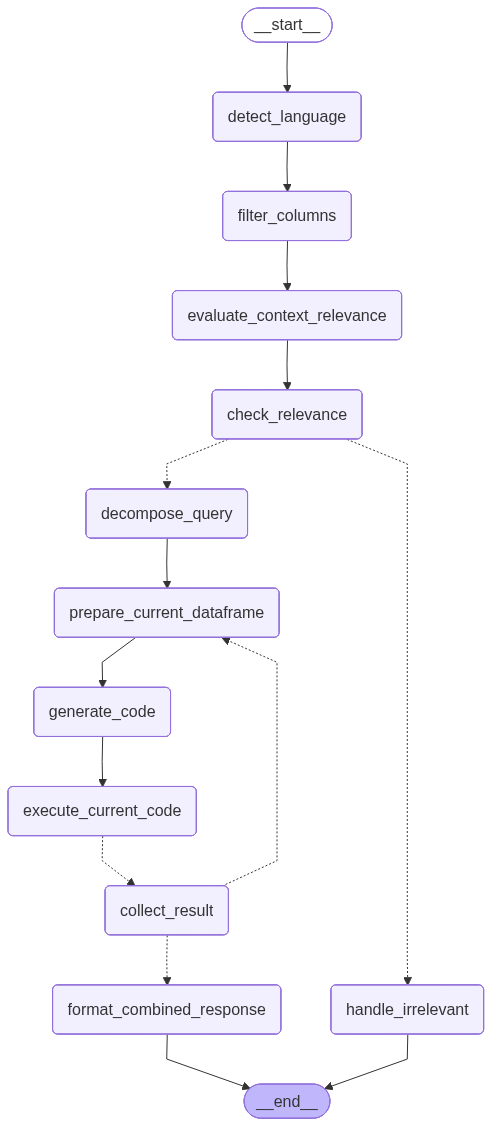

In [11]:
from IPython.display import Image, display
app = create_gastat_chatbot_graph_with_memory()
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:

def chat_with_memory(app, conversation_id: str, user_message: str, model_name: str = 'qwen3-coder:30b'):
    """
    FIXED: Properly load and save conversation state
    """

    # Configuration for this conversation thread
    config = {
        "configurable": {
            "thread_id": conversation_id
        },
        "recursion_limit": 50
    }

    # CRITICAL FIX: Get previous state from checkpointer
    try:
        # Get the last checkpoint for this thread
        checkpoint = app.get_state(config)
        previous_state = checkpoint.values if checkpoint else {}
        previous_history = previous_state.get('message_history', [])

        print(f"📚 Loaded {len(previous_history)} previous messages from memory")

    except Exception as e:
        print(f"⚠️ No previous state found (new conversation): {e}")
        previous_history = []

    # Build initial state with loaded history
    initial_state = {
        'question': user_message,
        'original_question': user_message,
        'conversation_id': conversation_id,
        'message_history': previous_history,  # CRITICAL: Use loaded history
        'model_name':model_name,



        'previous_query': previous_state.get('previous_query'),
        'previous_dataframes': previous_state.get('previous_dataframes'),
        'previous_results': previous_state.get('previous_results'),

        'available_dataframes': [],
        'relevance_check': None,
        'query_decomposition': None,

        'current_df_index': 0,
        'dataframes_to_process': [],
        'current_df_requirement': '',

        'current_generated_code': '',
        'current_execution_result': '',
        'current_error': '',

        'generated_codes': [],
        'individual_results': {},

        'final_response': None,

        'attempts': 0,
        'error_message': '',

        'current_stage': 'initialized',
        'query_regenerated': False,
        'regeneration_count': 0,
        'max_attempts': 3
    }

    # Run with memory persistence
    final_state = app.invoke(initial_state, config)

    return final_state



# History

In [13]:
import uuid


# Initialize once
initialize_retriever()
app = create_gastat_chatbot_graph_with_memory()

# Create conversation ID (store in variable)
conversation_id = str(uuid.uuid4())
print(f"💬 Conversation ID: {conversation_id}")


🔍 Initializing RAG retriever...


/tmp/ipython-input-3705504473.py:114: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  self.encoder = HuggingFaceEmbeddings(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


🔍 Indexing 35 dataframes for hybrid retrieval...
✅ Indexed 35 dataframes with hybrid search
✅ Retriever initialized
💬 Conversation ID: e03fcd24-448d-4199-9ec6-d8b28508a671


In [23]:
conversation_id = str(uuid.uuid4())

# new


In [24]:
# First turn, df_umrah not in rag
result1 = chat_with_memory(
    app=app,
    conversation_id=conversation_id,  # Same ID
    user_message="عدد المعتمرين سنة 1441"

)

print(result1['final_response'].answer)

📚 Loaded 0 previous messages from memory
[NODE: detect_language] Detecting language for: عدد المعتمرين سنة 1441...
✅ Detected language: AR

[NODE: filter_columns] Filtering columns for AR...
✅ Column filtering complete. 35 schemas updated.

[NODE: evaluate_context_relevance] Analyzing context relevance
  No previous conversation - treating as new question
 🌍 Detected language: ar

[NODE: check_relevance] Checking relevance for: عدد المعتمرين سنة 1441
  🔍 Stage 1: Combined retrieval + reranking ...
  🔍 **DEBUG:** Top Candidate Details:
    1. **df_Real_Estate_Prices_DPV_RS_CHANGE_YEAR_0** (Category: Prices)
    2. **df_Wholesale_Prices_Statistics_DPV_WS_EFPI0301_4** (Category: Prices)
    3. **df_Real_Estate_Prices_DPV_RS_CHANGE_QTR_1** (Category: Prices)
    4. **df_umrah** (Category: Tourism, Hajj and Umrah)
    5. **df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_YEAR_5** (Category: Prices)
    6. **df_Wholesale_Prices_Statistics_DPV_WS_CHANGE_MONTH_6** (Category: Prices)
    7. **df_Re